### Incremental Training Experiment

This compares how well the Orthogonal Subspace Fine-Tuning (OSFT) continual training method works when it trains a network on chunks of a dataset at a time versus the entire dataset all at once.
OSFT works by decomposing 2D matrices with SVD, and freezing some $r$ amount of high-singular values and their corresponding singular vectors.
This allows us to freeze the values which correspond with the greatest amount of change or variance in the matrix, while training those which do not vary all that much.


We have the following experimental setup:

### **Baseline**:

Baseline is the `meta-llama/Llama-3.1-8B-Instruct` model out of the box, checking its accuracy on the QuaLITY benchmark in a closed-book scenario. 

### **Experiment**: Taking a dataset we generated for this benchmark, we train a model sequentially with OSFT on 3 equivalently-sized chunks of the dataset at a time.

**Control**: To control for this, we also train a model with the same OSFT hyperparameters on the entire dataset
**Control #2**: We also train a model with standard SFT (same exact dataset + hyperparams)
**Control #3 (TBD)**: We sequentially train the model with standard SFT

### Evals

- **Task evaluation**: We evaluate using our standard QuaLITY evaluation script
- **General performance eval**: Leaderboard v2 is used to measure model performance across a range of different domains

### Hyperparams

- LR: 5e-6
- Batch Size: 128
- LR Scheduler: cosine
- Epochs: 1, 2
- (OSFT) rank ratio: 0.5
- warmup steps: 0


### Results


**Results on QuaLITY** (EntityGraph)
	
| Experiment                                                       | Attempt Rate | Accuracy Among Attempted | Overall Accuracy     | Total Attempt Rate |
| :--------------------------------------------------------------- | -----------: | -----------------------: | ---------------:     | -----------------: |
| Llama-3.1-8b-instruct-baseline                                   |       0.9976 |                   0.4179 |           0.4169     |              0.973 |
| First Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, RR=0.5)        |            1 |                   0.4361 |           0.4361     |             0.9976 |
| Second Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5)       |            1 |                   0.4819 |           0.4819     |             0.9979 |
| Third Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5)        |            1 |                    0.506 |            0.506     |             0.9982 |
| OSFT, Full Dataset (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5) |            1 |                    0.494 |            0.494     |             0.9986 |
| SFT baseline, full dataset (BS 128, LR 5e-6, 1 epoch, cosine LR) |            1 |                   0.5181 |           0.5181     |              0.998 |
| SFT baseline, chunk 1 (BS 128, LR 5e-6, 1 epoch, cosine LR)      |            1 |                   0.4506 |           0.4506     |             0.9914 |
| SFT baseline, chunk 2 (BS 128, LR 5e-6, 1 epoch, cosine LR)      |            1 |                   0.5229 |           0.5229     |             0.9926 |
| SFT baseline, chunk 3 (BS 128, LR 5e-6, 1 epoch, cosine LR)      |            1 |                   0.5325 |           **0.5325** |             0.9363 |


Now we assess each checkpoint's leaderboard score. For this evaluation, I used the evaluation script located in https://github.com/instructlab/eval/blob/main/scripts/evaluate_best_checkpoint.py, using only default settings.

| Experiment                                                       | Overall   | BBH       | GPQA      | MMLU-Pro  | MUSR      | IFEval    | MATH-Hard |
| ---------------------------------------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- |
| meta-llama/Llama-3.1-8b-instruct baseline                        | 41.72     | **51.01** | 27.25     | 37.78     | 38.57     | **77.55** | **18.13** |
| First Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, RR=0.5)        | **42.61** | 50.01     | **31.91** | 37.87     | 43.06     | 76.61     | 16.19     |
| Second Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5)       | 41.28     | 49.18     | 30.06     | 37.87     | **44.51** | 71.35     | 14.71     |
| Third Chunk (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5)        | 40.70     | 49.51     | 31.77     | 37.06     | 41.19     | 70.40     | 14.29     |
| Full dataset (BS 128, LR 5e-6, 1 epoch, cosine LR, rr=0.5)       | 40.93     | 49.00     | 31.90     | 37.39     | 39.61     | 73.32     | 14.35     |
| SFT baseline, full dataset (BS 128, LR 5e-6, 1 epoch, cosine LR) | 39.50     | 49.52     | 31.22     | 37.15     | 39.60     | 65.05     | 14.48     |
| SFT baseline, chunk 1 (BS 128, LR 5e-6, 1 epoch, cosine LR)      | 40.23     | 49.81     | 31.68     | **38.09** | 41.74     | 66.06     | 14.02     |
| SFT baseline, chunk 2 (BS 128, LR 5e-6, 1 epoch, cosine LR)      | 38.95     | 48.95     | 31.81     | 37.71     | 41.35     | 59.67     | 14.21     |
| SFT baseline, chunk 3 (BS 128, LR 5e-6, 1 epoch, cosine LR)      | 36.14     | 49.84     | 29.13     | 36.86     | 36.17     | 49.32     | 15.52     |

**2-Epoch Results on QuaLITY** (EntityGraph)
	
| Experiment                                                       | Attempt Rate | Accuracy Among Attempted | Overall Accuracy | Total Attempt Rate |
| :--------------------------------------------------------------- | -----------: | -----------------------: | ---------------: | -----------------: |
| Llama-3.1-8b-instruct-baseline                                   |       0.9976 |                   0.4179 |           0.4169 |              0.973 |
| First Chunk (BS 128, LR 5e-6, 2 epoch, cosine LR, RR=0.5)        |            1 |                   0.4554 |           0.4554 |             0.9988 |
| Second Chunk (BS 128, LR 5e-6, 2 epoch, cosine LR, rr=0.5)       |            1 |                   0.4747 |           0.4747 |             0.9976 |
| Third Chunk (BS 128, LR 5e-6, 2 epoch, cosine LR, rr=0.5)        |            1 |                   0.5133 |           0.5133 |              0.998 |
| OSFT, Full Dataset (BS 128, LR 5e-6, 2 epoch, cosine LR, rr=0.5) |            1 |                   0.4795 |           0.4795 |             0.9965 |
| SFT baseline, full dataset (BS 128, LR 5e-6, 2 epoch, cosine LR) |            1 |                   0.5205 |           0.5205 |             0.9944 |
| SFT baseline, chunk 1 (BS 128, LR 5e-6, 2 epoch, cosine LR)      |            1 |                   0.4482 |           0.4482 |             0.9907 |
| SFT baseline, chunk 2 (BS 128, LR 5e-6, 2 epoch, cosine LR)      |            1 |                   0.5422 |           0.5422 |             0.9833 |
| SFT baseline, chunk 3 (BS 128, LR 5e-6, 2 epoch, cosine LR)      |            1 |                   0.5349 |           0.5349 |             0.9801 |

**2-Epoch Leaderboard Results**

| Experiment                                                       | Overall   | BBH       | GPQA      | MMLU-Pro  | MUSR      | IFEval    | MATH-Hard |
| ---------------------------------------------------------------- | --------- | --------- | --------- | --------- | --------- | --------- | --------- |
| meta-llama/Llama-3.1-8b-instruct baseline                        | 41.72     | **51.01** | 27.25     | 37.78     | 38.57     | **77.55** | **18.13** |
| First Chunk (BS 128, LR 5e-6, 2 epoch, cosine LR, RR=0.5)        | **42.88** | 49.37     | **34.07** | **37.99** | **43.86** | 76.95     | 15.07     |
| Second Chunk (BS 128, LR 5e-6, 2 epoch, cosine LR, rr=0.5)       | 40.84     | 47.88     | 30.76     | 36.88     | 44.37     | 71.65     | 13.52     |
| Third Chunk (BS 128, LR 5e-6, 2 epoch, cosine LR, rr=0.5)        | 40.39     | 48.98     | 32.33     | 36.63     | 39.19     | 70.70     | 14.54     |
| Full dataset (BS 128, LR 5e-6, 2 epoch, cosine LR, rr=0.5)       | 40.58     | 49.26     | 31.00     | 37.07     | 40.15     | 70.40     | 15.61     |
| SFT baseline, full dataset (BS 128, LR 5e-6, 2 epoch, cosine LR) | 39.79     | 49.14     | 31.90     | 36.95     | 38.30     | 68.06     | 14.40     |
| SFT baseline, chunk 1 (BS 128, LR 5e-6, 2 epoch, cosine LR)      | 40.26     | 49.10     | 32.12     | 37.65     | 43.33     | 65.65     | 13.71     |
| SFT baseline, chunk 2 (BS 128, LR 5e-6, 2 epoch, cosine LR)      | 39.50     | 48.07     | 32.42     | 37.11     | 41.73     | 64.29     | 13.40     |
| SFT baseline, chunk 3 (BS 128, LR 5e-6, 2 epoch, cosine LR)      | 37.54     | 49.05     | 30.67     | 36.08     | 37.23     | 57.69     | 14.52     |


In [2]:
# List of matplotlib style options to try (comment/uncomment as needed)
# plt.style.use('default')
# plt.style.use('classic')
# plt.style.use('Solarize_Light2')
# plt.style.use('seaborn')
# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-notebook')
# plt.style.use('seaborn-poster')
# plt.style.use('fivethirtyeight')
# plt.style.use('bmh')
# plt.style.use('dark_background')
# plt.style.use('ggplot')
# plt.style.use('grayscale')
# plt.style.use('fast')
# plt.style.use('tableau-colorblind10')


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style for better looking plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

# Define a professional color palette
professional_colors = [
    '#2E86AB',  # Blue
    '#A23B72',  # Magenta 
    '#F18F01',  # Orange
    '#C73E1D',  # Red
    '#592E83',  # Purple
    '#048A81'   # Teal
]

# Extract the experimental data from the markdown tables above (1-epoch results)
experiments_data = {
    'Baseline': {
        'quality_accuracy': 0.4169,
        'leaderboard_overall': 41.72,
        'leaderboard_categories': {
            'BBH': 51.01, 'GPQA': 27.25, 'MMLU-Pro': 37.78, 
            'MUSR': 38.57, 'IFEval': 77.55, 'MATH-Hard': 18.13
        },
        'training_stage': 0,
        'dataset_fraction': 0.0,
        'method': 'baseline',
        'epochs': 1
    },
    'First Chunk\n(OSFT)': {
        'quality_accuracy': 0.4361,
        'leaderboard_overall': 42.61,
        'leaderboard_categories': {
            'BBH': 50.01, 'GPQA': 31.91, 'MMLU-Pro': 37.87, 
            'MUSR': 43.06, 'IFEval': 76.61, 'MATH-Hard': 16.19
        },
        'training_stage': 1,
        'dataset_fraction': 0.33,
        'method': 'osft',
        'epochs': 1
    },
    'Second Chunk\n(OSFT)': {
        'quality_accuracy': 0.4819,
        'leaderboard_overall': 41.28,
        'leaderboard_categories': {
            'BBH': 49.18, 'GPQA': 30.06, 'MMLU-Pro': 37.87, 
            'MUSR': 44.51, 'IFEval': 71.35, 'MATH-Hard': 14.71
        },
        'training_stage': 2,
        'dataset_fraction': 0.66,
        'method': 'osft',
        'epochs': 1
    },
    'Third Chunk\n(OSFT)': {
        'quality_accuracy': 0.506,
        'leaderboard_overall': 40.70,
        'leaderboard_categories': {
            'BBH': 49.51, 'GPQA': 31.77, 'MMLU-Pro': 37.06, 
            'MUSR': 41.19, 'IFEval': 70.40, 'MATH-Hard': 14.29
        },
        'training_stage': 3,
        'dataset_fraction': 1.0,
        'method': 'osft',
        'epochs': 1
    },
    'Complete Dataset\n(OSFT)': {
        'quality_accuracy': 0.494,
        'leaderboard_overall': 40.93,
        'leaderboard_categories': {
            'BBH': 49.00, 'GPQA': 31.90, 'MMLU-Pro': 37.39, 
            'MUSR': 39.61, 'IFEval': 73.32, 'MATH-Hard': 14.35
        },
        'training_stage': 3,
        'dataset_fraction': 1.0,
        'method': 'osft',
        'epochs': 1
    },
    'First Chunk\n(SFT)': {
        'quality_accuracy': 0.4506,
        'leaderboard_overall': 40.23,
        'leaderboard_categories': {
            'BBH': 49.81, 'GPQA': 31.68, 'MMLU-Pro': 38.09, 
            'MUSR': 41.74, 'IFEval': 66.06, 'MATH-Hard': 14.02
        },
        'training_stage': 1,
        'dataset_fraction': 0.33,
        'method': 'sft',
        'epochs': 1
    },
    'Second Chunk\n(SFT)': {
        'quality_accuracy': 0.5229,
        'leaderboard_overall': 38.95,
        'leaderboard_categories': {
            'BBH': 48.95, 'GPQA': 31.81, 'MMLU-Pro': 37.71, 
            'MUSR': 41.35, 'IFEval': 59.67, 'MATH-Hard': 14.21
        },
        'training_stage': 2,
        'dataset_fraction': 0.66,
        'method': 'sft',
        'epochs': 1
    },
    'Third Chunk\n(SFT)': {
        'quality_accuracy': 0.5325,
        'leaderboard_overall': 36.14,
        'leaderboard_categories': {
            'BBH': 49.84, 'GPQA': 29.13, 'MMLU-Pro': 36.86, 
            'MUSR': 36.17, 'IFEval': 49.32, 'MATH-Hard': 15.52
        },
        'training_stage': 3,
        'dataset_fraction': 1.0,
        'method': 'sft',
        'epochs': 1
    },
    'Complete Dataset\n(SFT)': {
        'quality_accuracy': 0.5181,
        'leaderboard_overall': 39.50,
        'leaderboard_categories': {
            'BBH': 49.52, 'GPQA': 31.22, 'MMLU-Pro': 37.15, 
            'MUSR': 39.60, 'IFEval': 65.05, 'MATH-Hard': 14.48
        },
        'training_stage': 3,
        'dataset_fraction': 1.0,
        'method': 'sft',
        'epochs': 1
    }
}

print("1-epoch experimental data loaded successfully!")
print(f"Total experiments: {len(experiments_data)}")


1-epoch experimental data loaded successfully!
Total experiments: 9


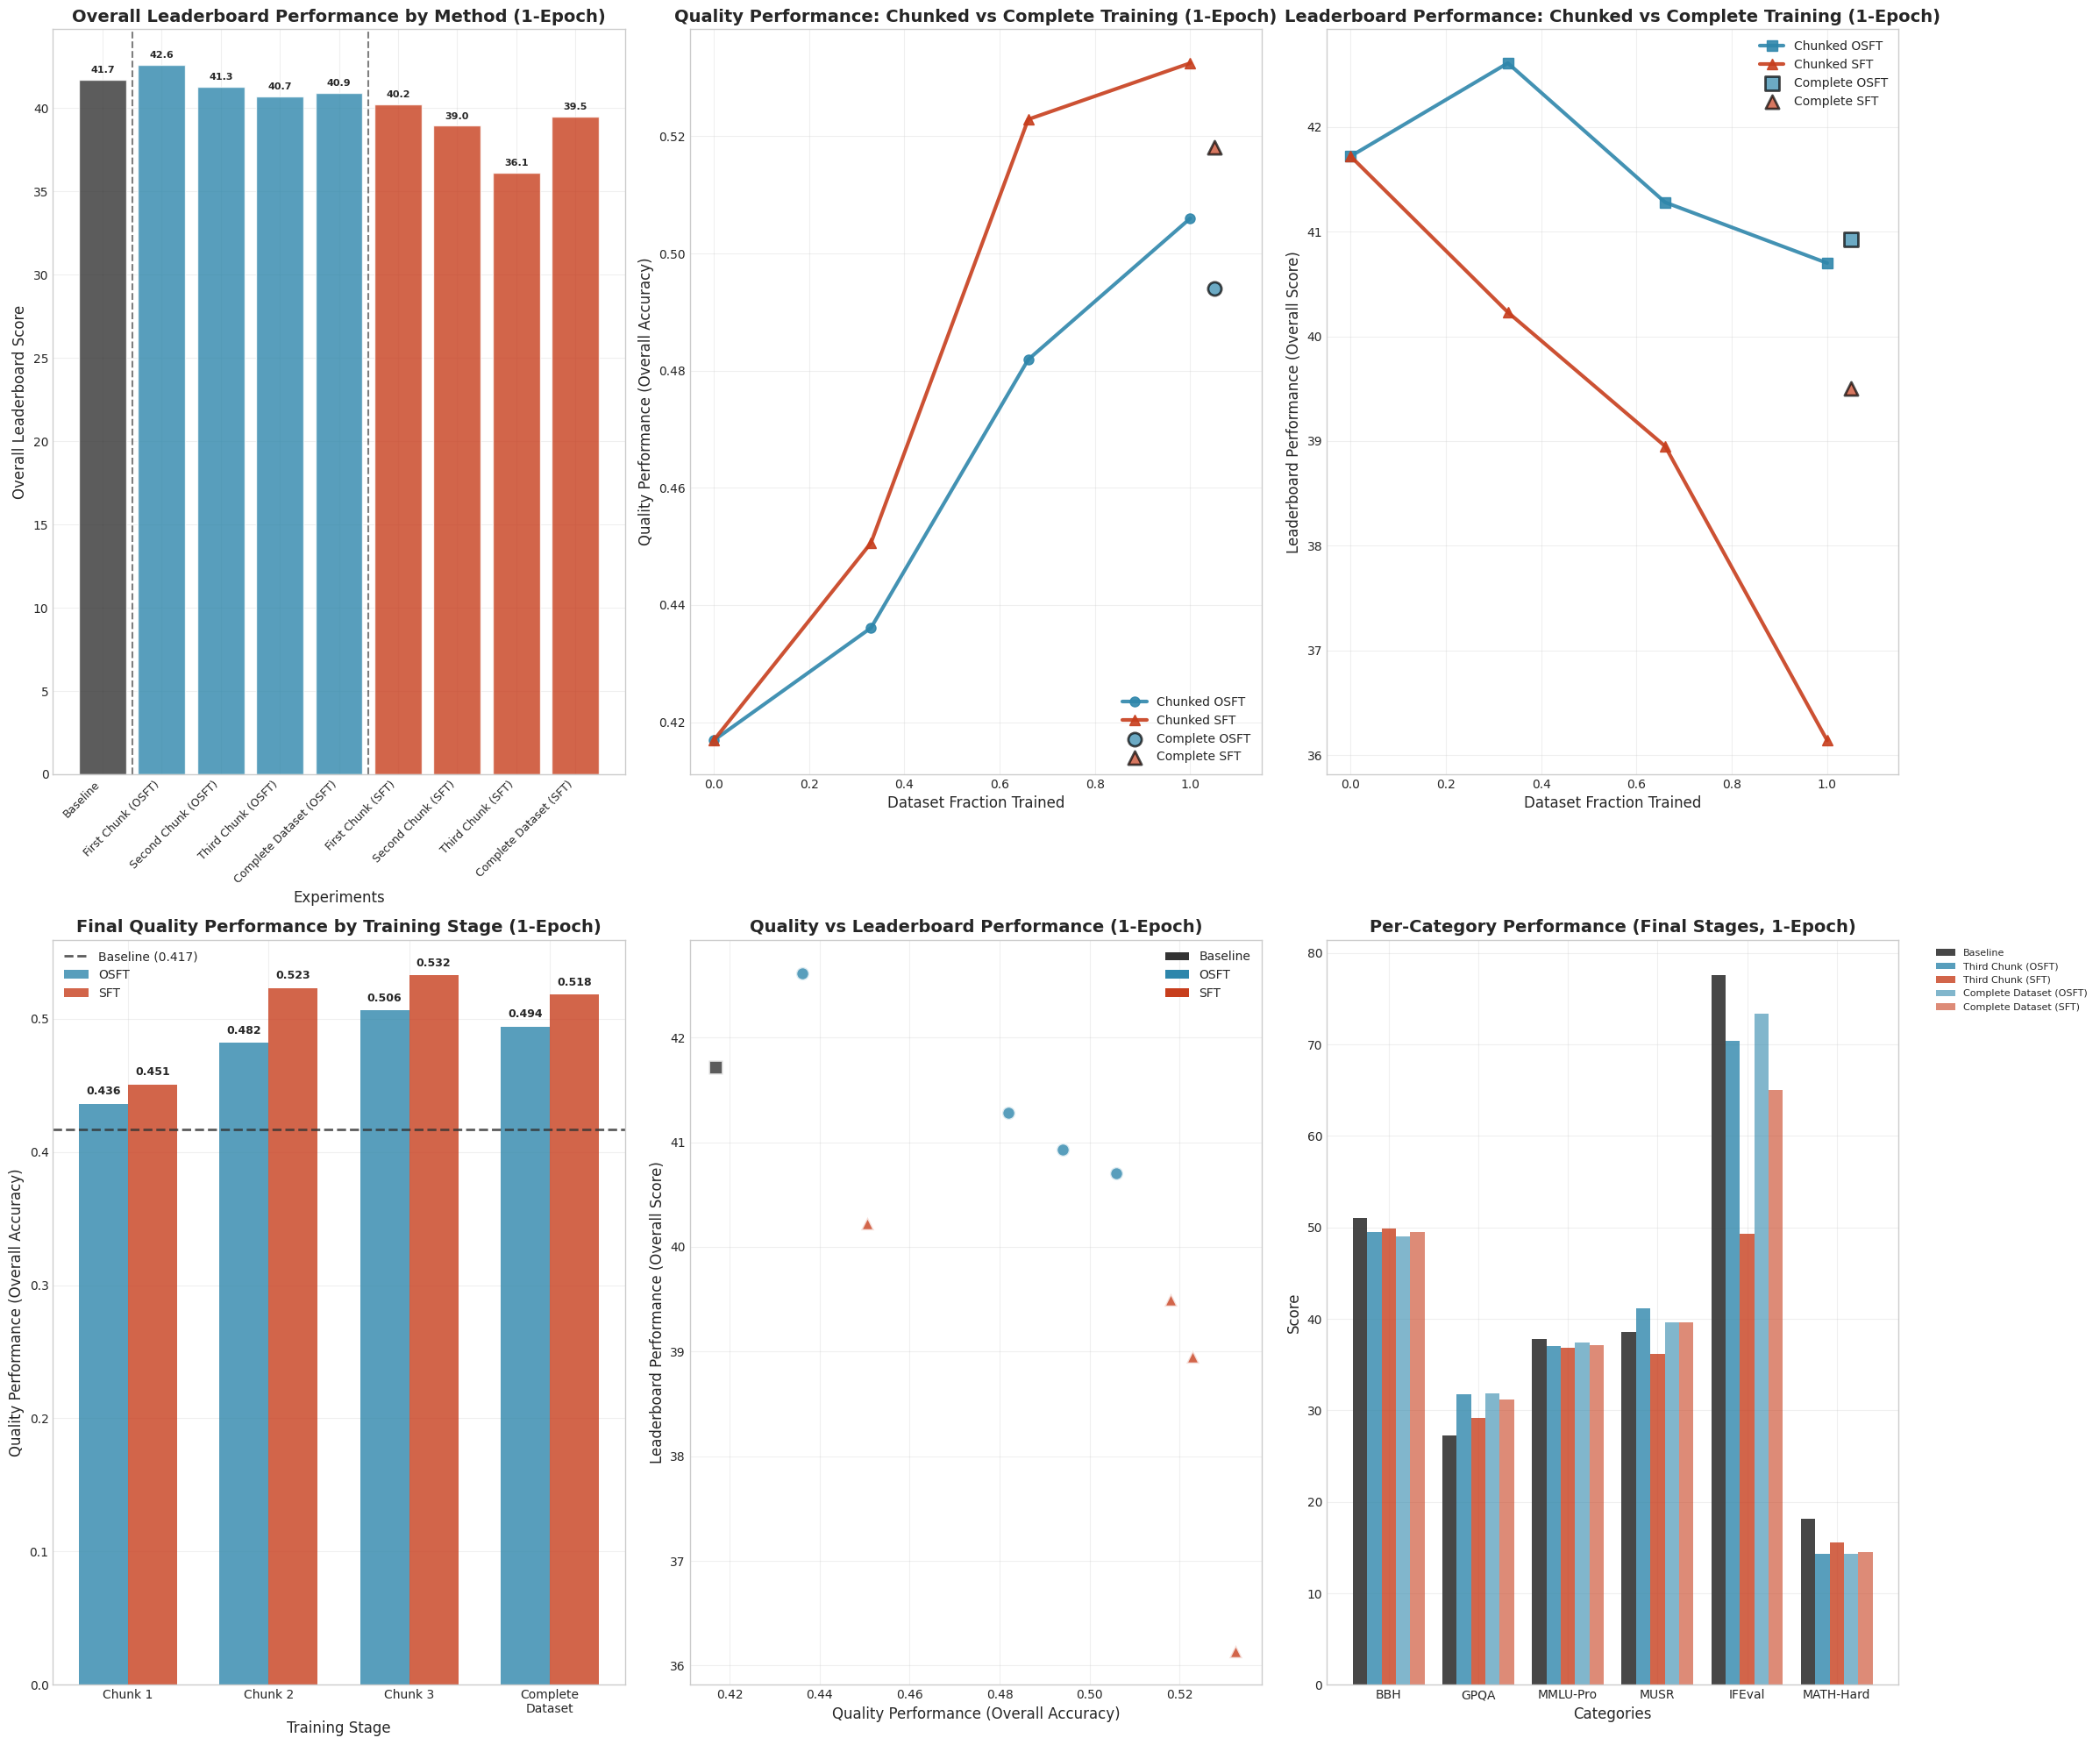

All plots created successfully using 1-epoch data!

Summary of plots:
1. Bar chart: Overall leaderboard performance by method (baseline/OSFT/SFT)
2. Temporal plot: Quality performance progression (chunked vs complete)
3. Temporal plot: Leaderboard performance progression (chunked vs complete)
4. Bar chart: Final quality performance comparison by training stage
5. Scatter plot: Quality vs Leaderboard performance (color-coded by method)
6. Bar chart: Per-category performance for key experiments


In [8]:
# Plots for 1-epoch experiments

# Create a comprehensive figure with all requested plots
fig = plt.figure(figsize=(24, 20))

# Organize experiments by method for better visualization
exp_names = list(experiments_data.keys())
baseline_exps = [name for name in exp_names if experiments_data[name]['method'] == 'baseline']
osft_exps = [name for name in exp_names if experiments_data[name]['method'] == 'osft']
sft_exps = [name for name in exp_names if experiments_data[name]['method'] == 'sft']

# 1. Bar chart comparing overall leaderboard performance (grouped by method)
ax1 = plt.subplot(2, 3, 1)

# Group experiments for clearer visualization
grouped_exps = baseline_exps + osft_exps + sft_exps
overall_scores = [experiments_data[exp]['leaderboard_overall'] for exp in grouped_exps]

# Assign colors based on method
colors_grouped = []
for exp in grouped_exps:
    if experiments_data[exp]['method'] == 'baseline':
        colors_grouped.append('#333333')  # Gray for baseline
    elif experiments_data[exp]['method'] == 'osft':
        colors_grouped.append('#2E86AB')  # Blue for OSFT
    else:  # sft
        colors_grouped.append('#C73E1D')  # Red for SFT

bars1 = ax1.bar(range(len(grouped_exps)), overall_scores, color=colors_grouped, alpha=0.8, edgecolor='white', linewidth=1)
ax1.set_xlabel('Experiments', fontsize=12)
ax1.set_ylabel('Overall Leaderboard Score', fontsize=12)
ax1.set_title('Overall Leaderboard Performance by Method (1-Epoch)', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(grouped_exps)))
ax1.set_xticklabels([exp.replace('\n', ' ') for exp in grouped_exps], rotation=45, ha='right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars1, overall_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Add method group separators
ax1.axvline(x=0.5, color='black', linestyle='--', alpha=0.5)
ax1.axvline(x=len(baseline_exps + osft_exps) - 0.5, color='black', linestyle='--', alpha=0.5)

# 2. Temporal plot showing both OSFT and SFT progression (Quality)
ax2 = plt.subplot(2, 3, 2)

# Prepare OSFT progression data
osft_fractions = [0.0, 0.33, 0.66, 1.0]
osft_quality = [
    experiments_data['Baseline']['quality_accuracy'],
    experiments_data['First Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data['Second Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data['Third Chunk\n(OSFT)']['quality_accuracy']
]

# Prepare SFT progression data
sft_fractions = [0.0, 0.33, 0.66, 1.0]
sft_quality = [
    experiments_data['Baseline']['quality_accuracy'],
    experiments_data['First Chunk\n(SFT)']['quality_accuracy'],
    experiments_data['Second Chunk\n(SFT)']['quality_accuracy'],
    experiments_data['Third Chunk\n(SFT)']['quality_accuracy']
]

# Plot Quality Performance progression
ax2.plot(osft_fractions, osft_quality, 'o-', linewidth=3, markersize=8, 
         label='Chunked OSFT', color='#2E86AB', alpha=0.9)
ax2.plot(sft_fractions, sft_quality, '^-', linewidth=3, markersize=8, 
         label='Chunked SFT', color='#C73E1D', alpha=0.9)

# Add complete dataset points
ax2.scatter([1.05], [experiments_data['Complete Dataset\n(OSFT)']['quality_accuracy']], 
           s=120, marker='o', color='#2E86AB', alpha=0.7, edgecolors='black', linewidth=2, 
           label='Complete OSFT')
ax2.scatter([1.05], [experiments_data['Complete Dataset\n(SFT)']['quality_accuracy']], 
           s=120, marker='^', color='#C73E1D', alpha=0.7, edgecolors='black', linewidth=2,
           label='Complete SFT')

ax2.set_xlabel('Dataset Fraction Trained', fontsize=12)
ax2.set_ylabel('Quality Performance (Overall Accuracy)', fontsize=12)
ax2.set_title('Quality Performance: Chunked vs Complete Training (1-Epoch)', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', fontsize=10)
ax2.set_xlim(-0.05, 1.15)
ax2.grid(True, alpha=0.3)

# 3. Temporal plot showing leaderboard progression
ax3 = plt.subplot(2, 3, 3)

osft_leaderboard = [
    experiments_data['Baseline']['leaderboard_overall'],
    experiments_data['First Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data['Second Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data['Third Chunk\n(OSFT)']['leaderboard_overall']
]

sft_leaderboard = [
    experiments_data['Baseline']['leaderboard_overall'],
    experiments_data['First Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data['Second Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data['Third Chunk\n(SFT)']['leaderboard_overall']
]

# Plot Leaderboard Performance progression  
ax3.plot(osft_fractions, osft_leaderboard, 's-', linewidth=3, markersize=8,
         label='Chunked OSFT', color='#2E86AB', alpha=0.9)
ax3.plot(sft_fractions, sft_leaderboard, '^-', linewidth=3, markersize=8,
         label='Chunked SFT', color='#C73E1D', alpha=0.9)

# Add complete dataset points
ax3.scatter([1.05], [experiments_data['Complete Dataset\n(OSFT)']['leaderboard_overall']], 
           s=120, marker='s', color='#2E86AB', alpha=0.7, edgecolors='black', linewidth=2,
           label='Complete OSFT')
ax3.scatter([1.05], [experiments_data['Complete Dataset\n(SFT)']['leaderboard_overall']], 
           s=120, marker='^', color='#C73E1D', alpha=0.7, edgecolors='black', linewidth=2,
           label='Complete SFT')

ax3.set_xlabel('Dataset Fraction Trained', fontsize=12)
ax3.set_ylabel('Leaderboard Performance (Overall Score)', fontsize=12)
ax3.set_title('Leaderboard Performance: Chunked vs Complete Training (1-Epoch)', fontsize=14, fontweight='bold')
ax3.legend(loc='upper right', fontsize=10)
ax3.set_xlim(-0.05, 1.15)
ax3.grid(True, alpha=0.3)

# 4. Quality Accuracy comparison: Chunked training final results
ax4 = plt.subplot(2, 3, 4)

chunk_stages = ['Chunk 1', 'Chunk 2', 'Chunk 3', 'Complete\nDataset']
osft_chunk_quality = [
    experiments_data['First Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data['Second Chunk\n(OSFT)']['quality_accuracy'], 
    experiments_data['Third Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data['Complete Dataset\n(OSFT)']['quality_accuracy']
]
sft_chunk_quality = [
    experiments_data['First Chunk\n(SFT)']['quality_accuracy'],
    experiments_data['Second Chunk\n(SFT)']['quality_accuracy'],
    experiments_data['Third Chunk\n(SFT)']['quality_accuracy'],
    experiments_data['Complete Dataset\n(SFT)']['quality_accuracy']
]

x = np.arange(len(chunk_stages))
width = 0.35

bars1 = ax4.bar(x - width/2, osft_chunk_quality, width, label='OSFT', color='#2E86AB', alpha=0.8)
bars2 = ax4.bar(x + width/2, sft_chunk_quality, width, label='SFT', color='#C73E1D', alpha=0.8)

# Add baseline line
baseline_quality = experiments_data['Baseline']['quality_accuracy']
ax4.axhline(y=baseline_quality, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_quality:.3f})', alpha=0.8)

# Add value labels on bars
for bar, score in zip(bars1, osft_chunk_quality):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

for bar, score in zip(bars2, sft_chunk_quality):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax4.set_xlabel('Training Stage', fontsize=12)
ax4.set_ylabel('Quality Performance (Overall Accuracy)', fontsize=12)
ax4.set_title('Final Quality Performance by Training Stage (1-Epoch)', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(chunk_stages, fontsize=10)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# 5. Scatter plot: Quality vs Leaderboard Performance (colored by method)
ax5 = plt.subplot(2, 3, 5)
quality_scores = [experiments_data[exp]['quality_accuracy'] for exp in exp_names]
leaderboard_scores = [experiments_data[exp]['leaderboard_overall'] for exp in exp_names]

# Plot points with different colors and markers for each method
for i, exp in enumerate(exp_names):
    if experiments_data[exp]['method'] == 'baseline':
        color, marker = '#333333', 's'
    elif experiments_data[exp]['method'] == 'osft':
        color, marker = '#2E86AB', 'o'
    else:  # sft
        color, marker = '#C73E1D', '^'
    
    ax5.scatter(quality_scores[i], leaderboard_scores[i], c=color, s=120, alpha=0.8, 
               marker=marker, edgecolors='white', linewidth=2)

# Add legend for methods
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#333333', label='Baseline'),
                  Patch(facecolor='#2E86AB', label='OSFT'),
                  Patch(facecolor='#C73E1D', label='SFT')]
ax5.legend(handles=legend_elements, loc='upper right', fontsize=10)

ax5.set_xlabel('Quality Performance (Overall Accuracy)', fontsize=12)
ax5.set_ylabel('Leaderboard Performance (Overall Score)', fontsize=12)
ax5.set_title('Quality vs Leaderboard Performance (1-Epoch)', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)

# 6. Per-category comparison for key experiments (including baseline)
ax6 = plt.subplot(2, 3, 6)
categories = ['BBH', 'GPQA', 'MMLU-Pro', 'MUSR', 'IFEval', 'MATH-Hard']
x = np.arange(len(categories))

# Select key experiments for comparison (including baseline)
key_exps = ['Baseline', 'Third Chunk\n(OSFT)', 'Third Chunk\n(SFT)', 'Complete Dataset\n(OSFT)', 'Complete Dataset\n(SFT)']
width = 0.16  # Adjusted width to fit more bars

for i, exp in enumerate(key_exps):
    scores = [experiments_data[exp]['leaderboard_categories'][cat] for cat in categories]
    offset = (i - len(key_exps)/2 + 0.5) * width
    
    if exp == 'Baseline':
        color = '#333333'  # Gray for baseline
        alpha = 0.9
    elif 'OSFT' in exp:
        color = '#2E86AB'
        alpha = 0.8 if 'Third' in exp else 0.6
    else:
        color = '#C73E1D'
        alpha = 0.8 if 'Third' in exp else 0.6
    
    bars = ax6.bar(x + offset, scores, width, label=exp.replace('\n', ' '), color=color, alpha=alpha)

ax6.set_xlabel('Categories', fontsize=12)
ax6.set_ylabel('Score', fontsize=12)
ax6.set_title('Per-Category Performance (Final Stages, 1-Epoch)', fontsize=14, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(categories, fontsize=10)
ax6.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("All plots created successfully using 1-epoch data!")
print("\nSummary of plots:")
print("1. Bar chart: Overall leaderboard performance by method (baseline/OSFT/SFT)")
print("2. Temporal plot: Quality performance progression (chunked vs complete)")
print("3. Temporal plot: Leaderboard performance progression (chunked vs complete)")
print("4. Bar chart: Final quality performance comparison by training stage")
print("5. Scatter plot: Quality vs Leaderboard performance (color-coded by method)")
print("6. Bar chart: Per-category performance for key experiments")


In [5]:
# 2-epoch experimental data

experiments_data_2epoch = {
    'Baseline': {
        'quality_accuracy': 0.4169,  # Same as 1-epoch
        'leaderboard_overall': 41.72,  # Same as 1-epoch
        'leaderboard_categories': {
            'BBH': 51.01, 'GPQA': 27.25, 'MMLU-Pro': 37.78, 
            'MUSR': 38.57, 'IFEval': 77.55, 'MATH-Hard': 18.13
        },
        'training_stage': 0,
        'dataset_fraction': 0.0,
        'method': 'baseline',
        'epochs': 2
    },
    'First Chunk\n(OSFT)': {
        'quality_accuracy': 0.4554,
        'leaderboard_overall': 42.88,
        'leaderboard_categories': {
            'BBH': 49.37, 'GPQA': 34.07, 'MMLU-Pro': 37.99, 
            'MUSR': 43.86, 'IFEval': 76.95, 'MATH-Hard': 15.07
        },
        'training_stage': 1,
        'dataset_fraction': 0.33,
        'method': 'osft',
        'epochs': 2
    },
    'Second Chunk\n(OSFT)': {
        'quality_accuracy': 0.4747,
        'leaderboard_overall': 40.84,
        'leaderboard_categories': {
            'BBH': 47.88, 'GPQA': 30.76, 'MMLU-Pro': 36.88, 
            'MUSR': 44.37, 'IFEval': 71.65, 'MATH-Hard': 13.52
        },
        'training_stage': 2,
        'dataset_fraction': 0.66,
        'method': 'osft',
        'epochs': 2
    },
    'Third Chunk\n(OSFT)': {
        'quality_accuracy': 0.5133,
        'leaderboard_overall': 40.39,
        'leaderboard_categories': {
            'BBH': 48.98, 'GPQA': 32.33, 'MMLU-Pro': 36.63, 
            'MUSR': 39.19, 'IFEval': 70.70, 'MATH-Hard': 14.54
        },
        'training_stage': 3,
        'dataset_fraction': 1.0,
        'method': 'osft',
        'epochs': 2
    },
    'Complete Dataset\n(OSFT)': {
        'quality_accuracy': 0.4795,
        'leaderboard_overall': 40.58,
        'leaderboard_categories': {
            'BBH': 49.26, 'GPQA': 31.00, 'MMLU-Pro': 37.07, 
            'MUSR': 40.15, 'IFEval': 70.40, 'MATH-Hard': 15.61
        },
        'training_stage': 3,
        'dataset_fraction': 1.0,
        'method': 'osft',
        'epochs': 2
    },
    'First Chunk\n(SFT)': {
        'quality_accuracy': 0.4482,
        'leaderboard_overall': 40.26,
        'leaderboard_categories': {
            'BBH': 49.10, 'GPQA': 32.12, 'MMLU-Pro': 37.65, 
            'MUSR': 43.33, 'IFEval': 65.65, 'MATH-Hard': 13.71
        },
        'training_stage': 1,
        'dataset_fraction': 0.33,
        'method': 'sft',
        'epochs': 2
    },
    'Second Chunk\n(SFT)': {
        'quality_accuracy': 0.5422,
        'leaderboard_overall': 39.50,
        'leaderboard_categories': {
            'BBH': 48.07, 'GPQA': 32.42, 'MMLU-Pro': 37.11, 
            'MUSR': 41.73, 'IFEval': 64.29, 'MATH-Hard': 13.40
        },
        'training_stage': 2,
        'dataset_fraction': 0.66,
        'method': 'sft',
        'epochs': 2
    },
    'Third Chunk\n(SFT)': {
        'quality_accuracy': 0.5349,
        'leaderboard_overall': 37.54,
        'leaderboard_categories': {
            'BBH': 49.05, 'GPQA': 30.67, 'MMLU-Pro': 36.08, 
            'MUSR': 37.23, 'IFEval': 57.69, 'MATH-Hard': 14.52
        },
        'training_stage': 3,
        'dataset_fraction': 1.0,
        'method': 'sft',
        'epochs': 2
    },
    'Complete Dataset\n(SFT)': {
        'quality_accuracy': 0.5205,
        'leaderboard_overall': 39.79,
        'leaderboard_categories': {
            'BBH': 49.14, 'GPQA': 31.90, 'MMLU-Pro': 36.95, 
            'MUSR': 38.30, 'IFEval': 68.06, 'MATH-Hard': 14.40
        },
        'training_stage': 3,
        'dataset_fraction': 1.0,
        'method': 'sft',
        'epochs': 2
    }
}

print("2-epoch experimental data loaded successfully!")
print(f"1-epoch experiments: {len(experiments_data)}")
print(f"2-epoch experiments: {len(experiments_data_2epoch)}")


2-epoch experimental data loaded successfully!
1-epoch experiments: 9
2-epoch experiments: 9


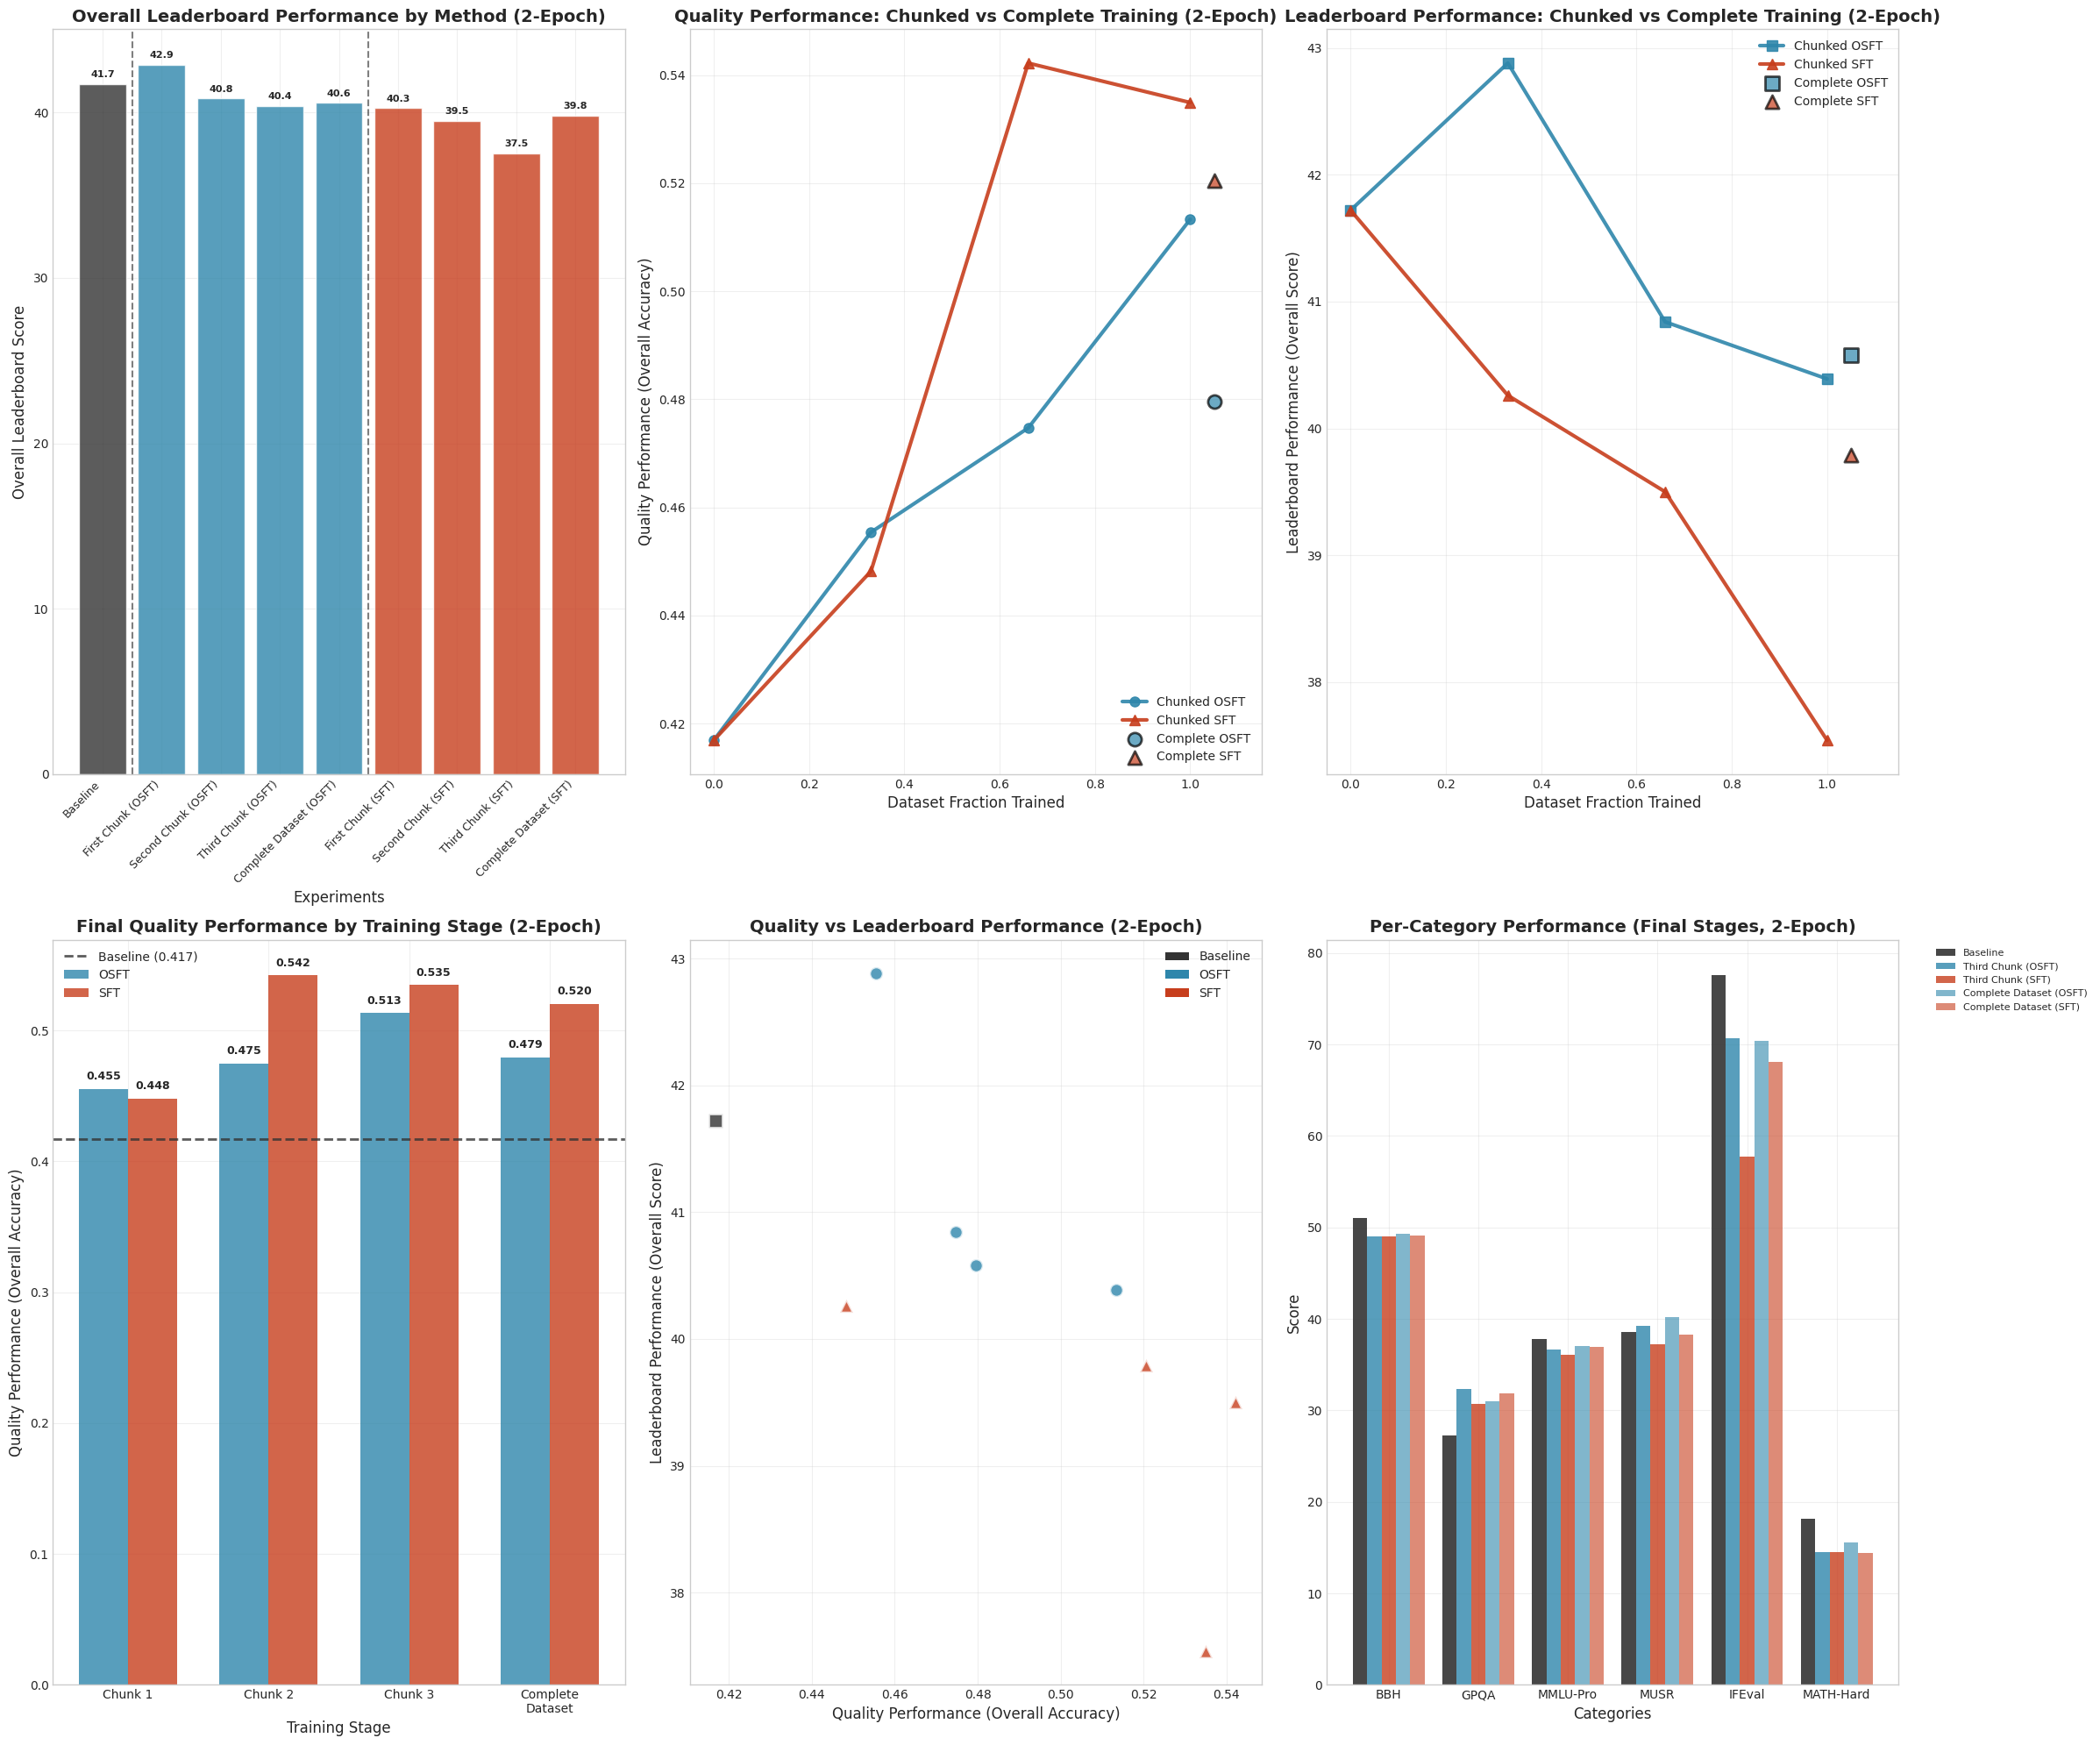

All plots created successfully using 2-epoch data!

Summary of plots:
1. Bar chart: Overall leaderboard performance by method (baseline/OSFT/SFT)
2. Temporal plot: Quality performance progression (chunked vs complete)
3. Temporal plot: Leaderboard performance progression (chunked vs complete)
4. Bar chart: Final quality performance comparison by training stage
5. Scatter plot: Quality vs Leaderboard performance (color-coded by method)
6. Bar chart: Per-category performance for key experiments


In [7]:
# Plots for 2-epoch experiments (same layout as 1-epoch)

# Create a comprehensive figure with all requested plots using 2-epoch data
fig = plt.figure(figsize=(24, 20))

# Organize experiments by method for better visualization
exp_names = list(experiments_data_2epoch.keys())
baseline_exps = [name for name in exp_names if experiments_data_2epoch[name]['method'] == 'baseline']
osft_exps = [name for name in exp_names if experiments_data_2epoch[name]['method'] == 'osft']
sft_exps = [name for name in exp_names if experiments_data_2epoch[name]['method'] == 'sft']

# 1. Bar chart comparing overall leaderboard performance (grouped by method)
ax1 = plt.subplot(2, 3, 1)

# Group experiments for clearer visualization
grouped_exps = baseline_exps + osft_exps + sft_exps
overall_scores = [experiments_data_2epoch[exp]['leaderboard_overall'] for exp in grouped_exps]

# Assign colors based on method
colors_grouped = []
for exp in grouped_exps:
    if experiments_data_2epoch[exp]['method'] == 'baseline':
        colors_grouped.append('#333333')  # Gray for baseline
    elif experiments_data_2epoch[exp]['method'] == 'osft':
        colors_grouped.append('#2E86AB')  # Blue for OSFT
    else:  # sft
        colors_grouped.append('#C73E1D')  # Red for SFT

bars1 = ax1.bar(range(len(grouped_exps)), overall_scores, color=colors_grouped, alpha=0.8, edgecolor='white', linewidth=1)
ax1.set_xlabel('Experiments', fontsize=12)
ax1.set_ylabel('Overall Leaderboard Score', fontsize=12)
ax1.set_title('Overall Leaderboard Performance by Method (2-Epoch)', fontsize=14, fontweight='bold')
ax1.set_xticks(range(len(grouped_exps)))
ax1.set_xticklabels([exp.replace('\n', ' ') for exp in grouped_exps], rotation=45, ha='right', fontsize=9)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars1, overall_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Add method group separators
ax1.axvline(x=0.5, color='black', linestyle='--', alpha=0.5)
ax1.axvline(x=len(baseline_exps + osft_exps) - 0.5, color='black', linestyle='--', alpha=0.5)

# 2. Temporal plot showing both OSFT and SFT progression (Quality)
ax2 = plt.subplot(2, 3, 2)

# Prepare OSFT progression data
osft_fractions = [0.0, 0.33, 0.66, 1.0]
osft_quality = [
    experiments_data_2epoch['Baseline']['quality_accuracy'],
    experiments_data_2epoch['First Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data_2epoch['Second Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data_2epoch['Third Chunk\n(OSFT)']['quality_accuracy']
]

# Prepare SFT progression data
sft_fractions = [0.0, 0.33, 0.66, 1.0]
sft_quality = [
    experiments_data_2epoch['Baseline']['quality_accuracy'],
    experiments_data_2epoch['First Chunk\n(SFT)']['quality_accuracy'],
    experiments_data_2epoch['Second Chunk\n(SFT)']['quality_accuracy'],
    experiments_data_2epoch['Third Chunk\n(SFT)']['quality_accuracy']
]

# Plot Quality Performance progression
ax2.plot(osft_fractions, osft_quality, 'o-', linewidth=3, markersize=8, 
         label='Chunked OSFT', color='#2E86AB', alpha=0.9)
ax2.plot(sft_fractions, sft_quality, '^-', linewidth=3, markersize=8, 
         label='Chunked SFT', color='#C73E1D', alpha=0.9)

# Add complete dataset points
ax2.scatter([1.05], [experiments_data_2epoch['Complete Dataset\n(OSFT)']['quality_accuracy']], 
           s=120, marker='o', color='#2E86AB', alpha=0.7, edgecolors='black', linewidth=2, 
           label='Complete OSFT')
ax2.scatter([1.05], [experiments_data_2epoch['Complete Dataset\n(SFT)']['quality_accuracy']], 
           s=120, marker='^', color='#C73E1D', alpha=0.7, edgecolors='black', linewidth=2,
           label='Complete SFT')

ax2.set_xlabel('Dataset Fraction Trained', fontsize=12)
ax2.set_ylabel('Quality Performance (Overall Accuracy)', fontsize=12)
ax2.set_title('Quality Performance: Chunked vs Complete Training (2-Epoch)', fontsize=14, fontweight='bold')
ax2.legend(loc='lower right', fontsize=10)
ax2.set_xlim(-0.05, 1.15)
ax2.grid(True, alpha=0.3)

# 3. Temporal plot showing leaderboard progression
ax3 = plt.subplot(2, 3, 3)

osft_leaderboard = [
    experiments_data_2epoch['Baseline']['leaderboard_overall'],
    experiments_data_2epoch['First Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data_2epoch['Second Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data_2epoch['Third Chunk\n(OSFT)']['leaderboard_overall']
]

sft_leaderboard = [
    experiments_data_2epoch['Baseline']['leaderboard_overall'],
    experiments_data_2epoch['First Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data_2epoch['Second Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data_2epoch['Third Chunk\n(SFT)']['leaderboard_overall']
]

# Plot Leaderboard Performance progression  
ax3.plot(osft_fractions, osft_leaderboard, 's-', linewidth=3, markersize=8,
         label='Chunked OSFT', color='#2E86AB', alpha=0.9)
ax3.plot(sft_fractions, sft_leaderboard, '^-', linewidth=3, markersize=8,
         label='Chunked SFT', color='#C73E1D', alpha=0.9)

# Add complete dataset points
ax3.scatter([1.05], [experiments_data_2epoch['Complete Dataset\n(OSFT)']['leaderboard_overall']], 
           s=120, marker='s', color='#2E86AB', alpha=0.7, edgecolors='black', linewidth=2,
           label='Complete OSFT')
ax3.scatter([1.05], [experiments_data_2epoch['Complete Dataset\n(SFT)']['leaderboard_overall']], 
           s=120, marker='^', color='#C73E1D', alpha=0.7, edgecolors='black', linewidth=2,
           label='Complete SFT')

ax3.set_xlabel('Dataset Fraction Trained', fontsize=12)
ax3.set_ylabel('Leaderboard Performance (Overall Score)', fontsize=12)
ax3.set_title('Leaderboard Performance: Chunked vs Complete Training (2-Epoch)', fontsize=14, fontweight='bold')
ax3.legend(loc='upper right', fontsize=10)
ax3.set_xlim(-0.05, 1.15)
ax3.grid(True, alpha=0.3)

# 4. Quality Accuracy comparison: Chunked training final results
ax4 = plt.subplot(2, 3, 4)

chunk_stages = ['Chunk 1', 'Chunk 2', 'Chunk 3', 'Complete\nDataset']
osft_chunk_quality = [
    experiments_data_2epoch['First Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data_2epoch['Second Chunk\n(OSFT)']['quality_accuracy'], 
    experiments_data_2epoch['Third Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data_2epoch['Complete Dataset\n(OSFT)']['quality_accuracy']
]
sft_chunk_quality = [
    experiments_data_2epoch['First Chunk\n(SFT)']['quality_accuracy'],
    experiments_data_2epoch['Second Chunk\n(SFT)']['quality_accuracy'],
    experiments_data_2epoch['Third Chunk\n(SFT)']['quality_accuracy'],
    experiments_data_2epoch['Complete Dataset\n(SFT)']['quality_accuracy']
]

x = np.arange(len(chunk_stages))
width = 0.35

bars1 = ax4.bar(x - width/2, osft_chunk_quality, width, label='OSFT', color='#2E86AB', alpha=0.8)
bars2 = ax4.bar(x + width/2, sft_chunk_quality, width, label='SFT', color='#C73E1D', alpha=0.8)

# Add baseline line
baseline_quality = experiments_data_2epoch['Baseline']['quality_accuracy']
ax4.axhline(y=baseline_quality, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_quality:.3f})', alpha=0.8)

# Add value labels on bars
for bar, score in zip(bars1, osft_chunk_quality):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

for bar, score in zip(bars2, sft_chunk_quality):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax4.set_xlabel('Training Stage', fontsize=12)
ax4.set_ylabel('Quality Performance (Overall Accuracy)', fontsize=12)
ax4.set_title('Final Quality Performance by Training Stage (2-Epoch)', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(chunk_stages, fontsize=10)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

# 5. Scatter plot: Quality vs Leaderboard Performance (colored by method)
ax5 = plt.subplot(2, 3, 5)
quality_scores = [experiments_data_2epoch[exp]['quality_accuracy'] for exp in exp_names]
leaderboard_scores = [experiments_data_2epoch[exp]['leaderboard_overall'] for exp in exp_names]

# Plot points with different colors and markers for each method
for i, exp in enumerate(exp_names):
    if experiments_data_2epoch[exp]['method'] == 'baseline':
        color, marker = '#333333', 's'
    elif experiments_data_2epoch[exp]['method'] == 'osft':
        color, marker = '#2E86AB', 'o'
    else:  # sft
        color, marker = '#C73E1D', '^'
    
    ax5.scatter(quality_scores[i], leaderboard_scores[i], c=color, s=120, alpha=0.8, 
               marker=marker, edgecolors='white', linewidth=2)

# Add legend for methods
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#333333', label='Baseline'),
                  Patch(facecolor='#2E86AB', label='OSFT'),
                  Patch(facecolor='#C73E1D', label='SFT')]
ax5.legend(handles=legend_elements, loc='upper right', fontsize=10)

ax5.set_xlabel('Quality Performance (Overall Accuracy)', fontsize=12)
ax5.set_ylabel('Leaderboard Performance (Overall Score)', fontsize=12)
ax5.set_title('Quality vs Leaderboard Performance (2-Epoch)', fontsize=14, fontweight='bold')
ax5.grid(True, alpha=0.3)

# 6. Per-category comparison for key experiments (including baseline)
ax6 = plt.subplot(2, 3, 6)
categories = ['BBH', 'GPQA', 'MMLU-Pro', 'MUSR', 'IFEval', 'MATH-Hard']
x = np.arange(len(categories))

# Select key experiments for comparison (including baseline)
key_exps = ['Baseline', 'Third Chunk\n(OSFT)', 'Third Chunk\n(SFT)', 'Complete Dataset\n(OSFT)', 'Complete Dataset\n(SFT)']
width = 0.16  # Adjusted width to fit more bars

for i, exp in enumerate(key_exps):
    scores = [experiments_data_2epoch[exp]['leaderboard_categories'][cat] for cat in categories]
    offset = (i - len(key_exps)/2 + 0.5) * width
    
    if exp == 'Baseline':
        color = '#333333'  # Gray for baseline
        alpha = 0.9
    elif 'OSFT' in exp:
        color = '#2E86AB'
        alpha = 0.8 if 'Third' in exp else 0.6
    else:
        color = '#C73E1D'
        alpha = 0.8 if 'Third' in exp else 0.6
    
    bars = ax6.bar(x + offset, scores, width, label=exp.replace('\n', ' '), color=color, alpha=alpha)

ax6.set_xlabel('Categories', fontsize=12)
ax6.set_ylabel('Score', fontsize=12)
ax6.set_title('Per-Category Performance (Final Stages, 2-Epoch)', fontsize=14, fontweight='bold')
ax6.set_xticks(x)
ax6.set_xticklabels(categories, fontsize=10)
ax6.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("All plots created successfully using 2-epoch data!")
print("\nSummary of plots:")
print("1. Bar chart: Overall leaderboard performance by method (baseline/OSFT/SFT)")
print("2. Temporal plot: Quality performance progression (chunked vs complete)")
print("3. Temporal plot: Leaderboard performance progression (chunked vs complete)")
print("4. Bar chart: Final quality performance comparison by training stage")
print("5. Scatter plot: Quality vs Leaderboard performance (color-coded by method)")
print("6. Bar chart: Per-category performance for key experiments")


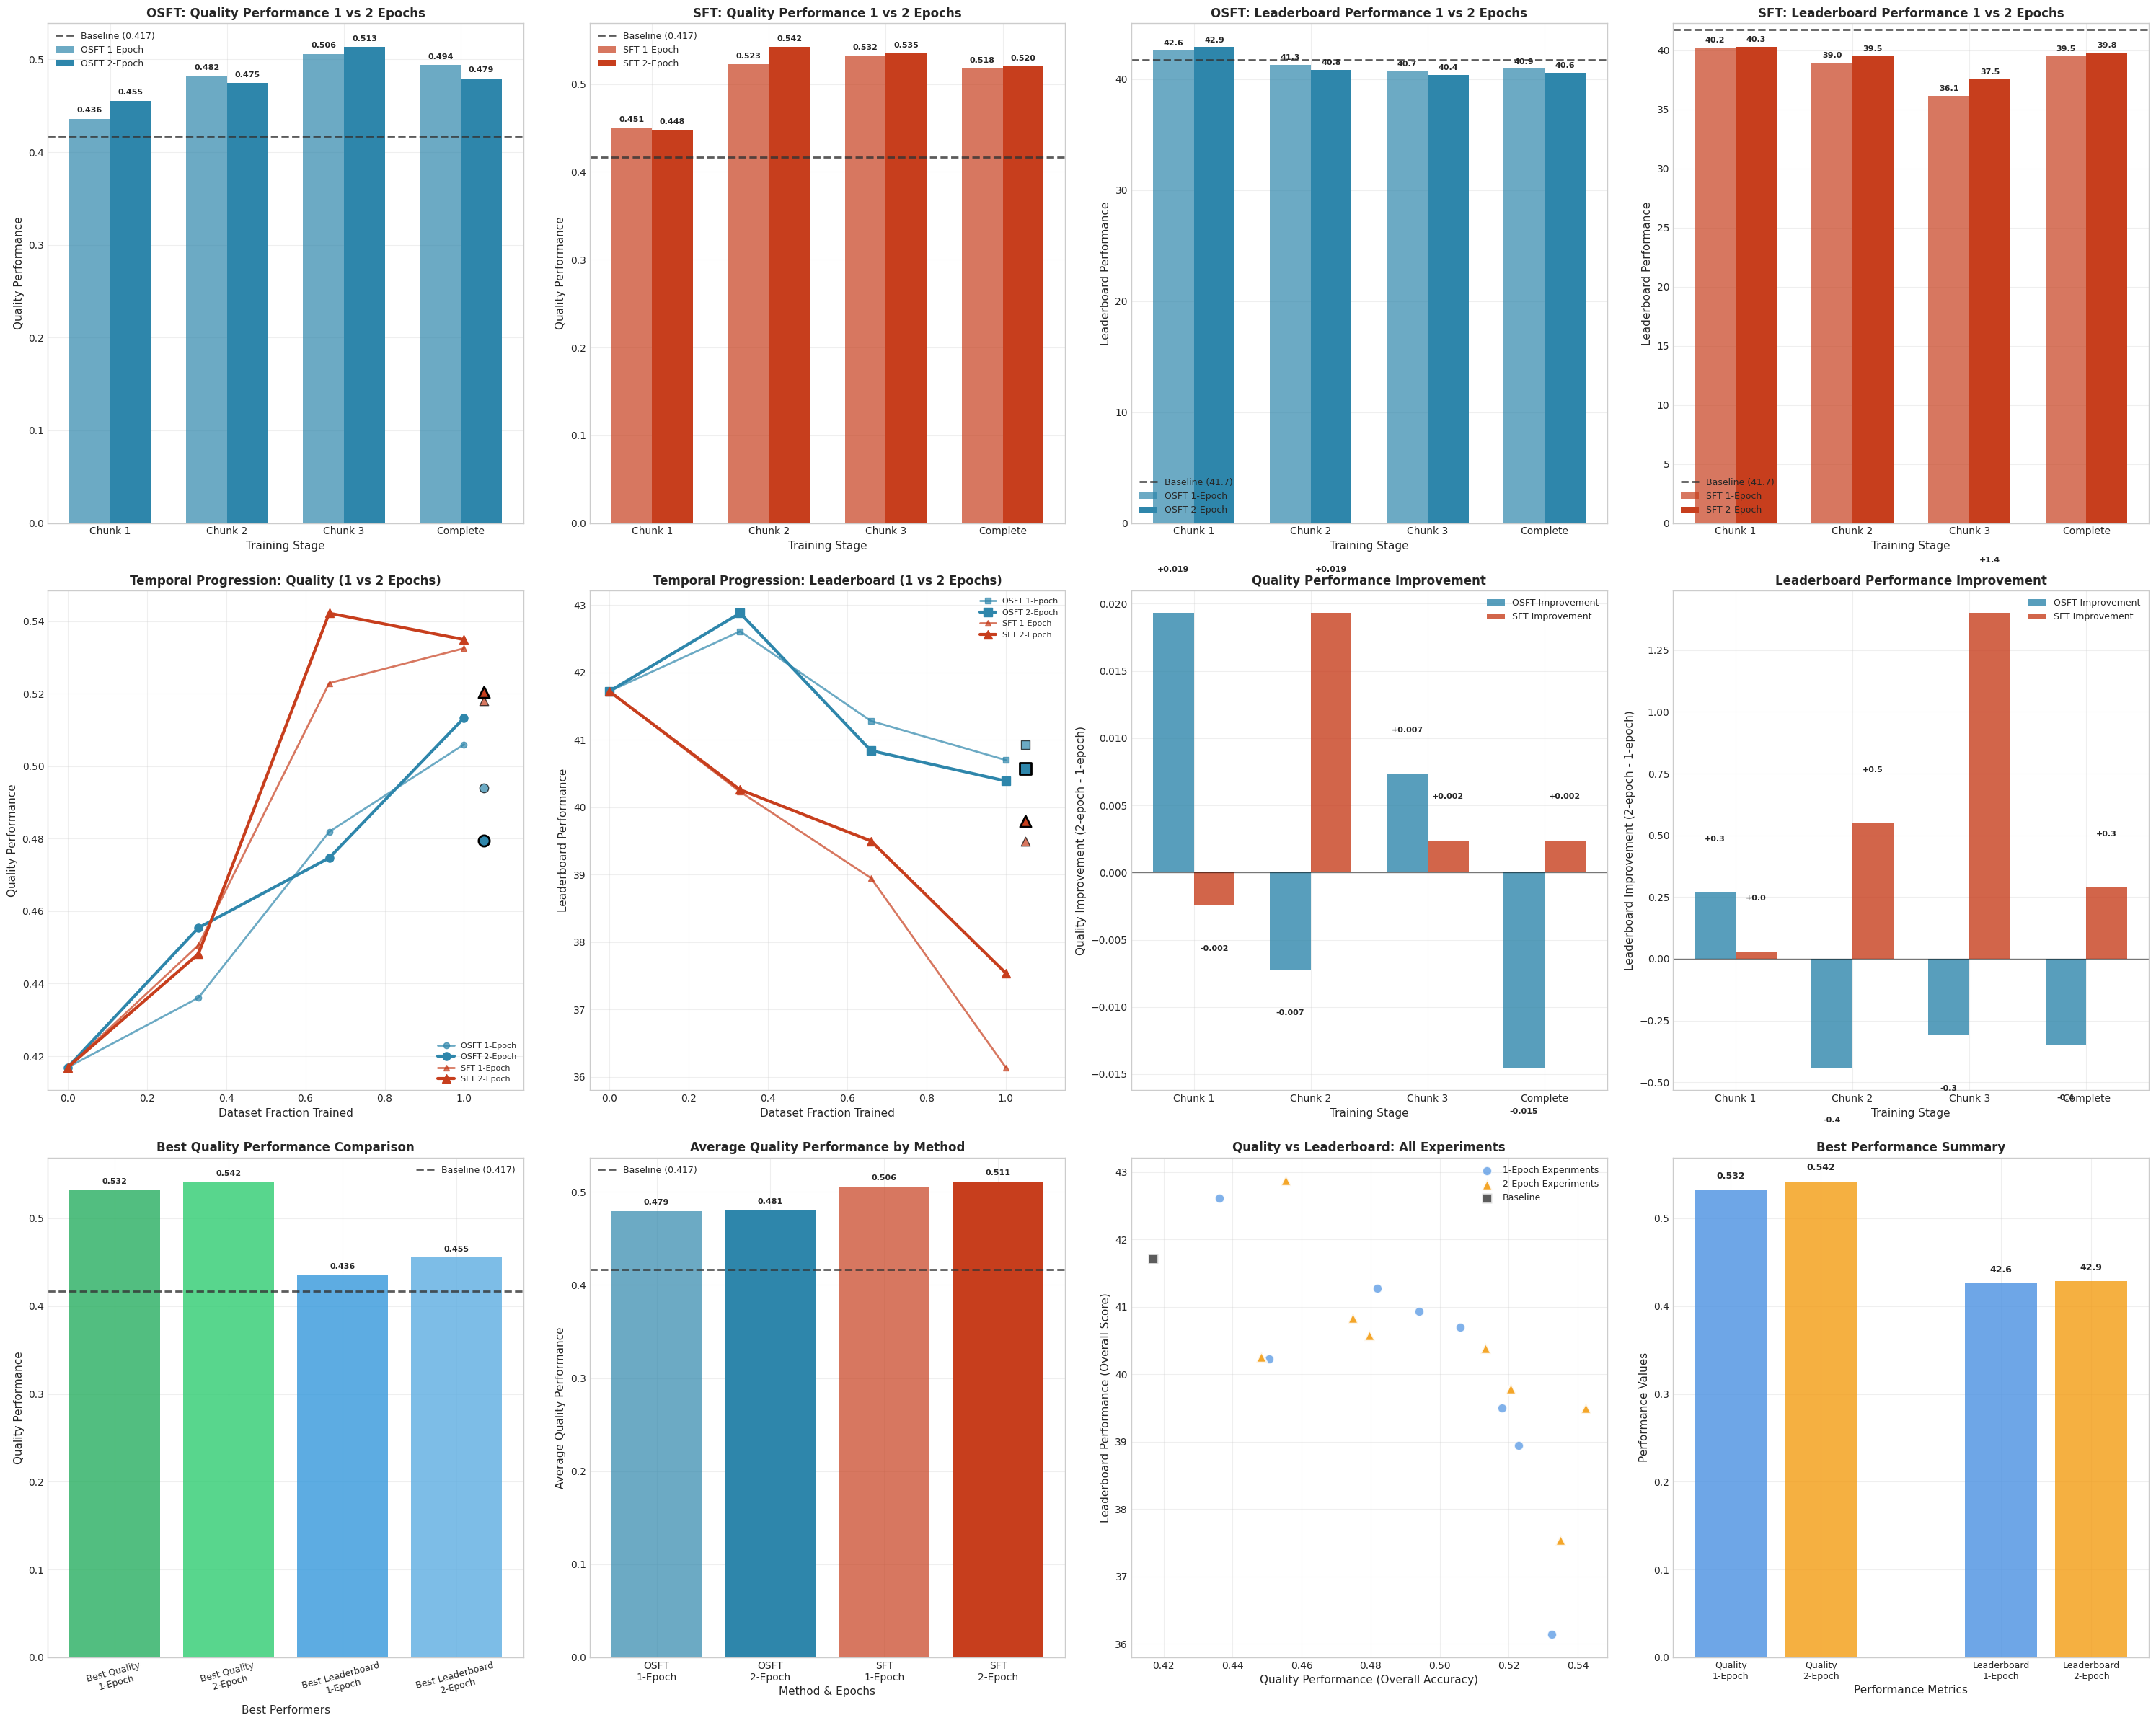

✅ Comprehensive 1-Epoch vs 2-Epoch comparison plots created!

📊 Plot Summary:
1-2: Quality performance comparison (OSFT & SFT)
3-4: Leaderboard performance comparison (OSFT & SFT)
5-6: Temporal progression comparison (Quality & Leaderboard)
7-8: Performance improvement analysis (2-epoch - 1-epoch)
9-10: Best performers and average performance
11-12: Scatter analysis and summary statistics


In [ ]:
# Comprehensive 1-Epoch vs 2-Epoch Comparison Plots

# Create comprehensive comparison figure
fig = plt.figure(figsize=(30, 24))

# Color schemes
colors_method = {'baseline': '#333333', 'osft': '#2E86AB', 'sft': '#C73E1D'}
colors_epoch = {'1-epoch': '#4A90E2', '2-epoch': '#F39C12'}

# 1. Quality Performance Comparison: 1-Epoch vs 2-Epoch (All Methods)
ax1 = plt.subplot(3, 4, 1)

# Prepare data for comparison
exp_stages = ['Chunk 1', 'Chunk 2', 'Chunk 3', 'Complete']

# OSFT data
osft_1epoch = [
    experiments_data['First Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data['Second Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data['Third Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data['Complete Dataset\n(OSFT)']['quality_accuracy']
]

osft_2epoch = [
    experiments_data_2epoch['First Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data_2epoch['Second Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data_2epoch['Third Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data_2epoch['Complete Dataset\n(OSFT)']['quality_accuracy']
]

x = np.arange(len(exp_stages))
width = 0.35

bars1 = ax1.bar(x - width/2, osft_1epoch, width, label='OSFT 1-Epoch', color='#2E86AB', alpha=0.7)
bars2 = ax1.bar(x + width/2, osft_2epoch, width, label='OSFT 2-Epoch', color='#2E86AB', alpha=1.0)

# Add baseline reference
baseline_quality = experiments_data['Baseline']['quality_accuracy']
ax1.axhline(y=baseline_quality, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_quality:.3f})', alpha=0.8)

# Add value labels
for bar, score in zip(bars1, osft_1epoch):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
for bar, score in zip(bars2, osft_2epoch):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

ax1.set_xlabel('Training Stage', fontsize=11)
ax1.set_ylabel('Quality Performance', fontsize=11)
ax1.set_title('OSFT: Quality Performance 1 vs 2 Epochs', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(exp_stages, fontsize=10)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. SFT Quality Performance Comparison
ax2 = plt.subplot(3, 4, 2)

# SFT data
sft_1epoch = [
    experiments_data['First Chunk\n(SFT)']['quality_accuracy'],
    experiments_data['Second Chunk\n(SFT)']['quality_accuracy'],
    experiments_data['Third Chunk\n(SFT)']['quality_accuracy'],
    experiments_data['Complete Dataset\n(SFT)']['quality_accuracy']
]

sft_2epoch = [
    experiments_data_2epoch['First Chunk\n(SFT)']['quality_accuracy'],
    experiments_data_2epoch['Second Chunk\n(SFT)']['quality_accuracy'],
    experiments_data_2epoch['Third Chunk\n(SFT)']['quality_accuracy'],
    experiments_data_2epoch['Complete Dataset\n(SFT)']['quality_accuracy']
]

bars3 = ax2.bar(x - width/2, sft_1epoch, width, label='SFT 1-Epoch', color='#C73E1D', alpha=0.7)
bars4 = ax2.bar(x + width/2, sft_2epoch, width, label='SFT 2-Epoch', color='#C73E1D', alpha=1.0)

# Add baseline reference
ax2.axhline(y=baseline_quality, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_quality:.3f})', alpha=0.8)

# Add value labels
for bar, score in zip(bars3, sft_1epoch):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
for bar, score in zip(bars4, sft_2epoch):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

ax2.set_xlabel('Training Stage', fontsize=11)
ax2.set_ylabel('Quality Performance', fontsize=11)
ax2.set_title('SFT: Quality Performance 1 vs 2 Epochs', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(exp_stages, fontsize=10)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. Leaderboard Performance Comparison: OSFT
ax3 = plt.subplot(3, 4, 3)

osft_1epoch_lb = [
    experiments_data['First Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data['Second Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data['Third Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data['Complete Dataset\n(OSFT)']['leaderboard_overall']
]

osft_2epoch_lb = [
    experiments_data_2epoch['First Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data_2epoch['Second Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data_2epoch['Third Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data_2epoch['Complete Dataset\n(OSFT)']['leaderboard_overall']
]

bars5 = ax3.bar(x - width/2, osft_1epoch_lb, width, label='OSFT 1-Epoch', color='#2E86AB', alpha=0.7)
bars6 = ax3.bar(x + width/2, osft_2epoch_lb, width, label='OSFT 2-Epoch', color='#2E86AB', alpha=1.0)

# Add baseline reference
baseline_lb = experiments_data['Baseline']['leaderboard_overall']
ax3.axhline(y=baseline_lb, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_lb:.1f})', alpha=0.8)

# Add value labels
for bar, score in zip(bars5, osft_1epoch_lb):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
for bar, score in zip(bars6, osft_2epoch_lb):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

ax3.set_xlabel('Training Stage', fontsize=11)
ax3.set_ylabel('Leaderboard Performance', fontsize=11)
ax3.set_title('OSFT: Leaderboard Performance 1 vs 2 Epochs', fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(exp_stages, fontsize=10)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# 4. Leaderboard Performance Comparison: SFT
ax4 = plt.subplot(3, 4, 4)

sft_1epoch_lb = [
    experiments_data['First Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data['Second Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data['Third Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data['Complete Dataset\n(SFT)']['leaderboard_overall']
]

sft_2epoch_lb = [
    experiments_data_2epoch['First Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data_2epoch['Second Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data_2epoch['Third Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data_2epoch['Complete Dataset\n(SFT)']['leaderboard_overall']
]

bars7 = ax4.bar(x - width/2, sft_1epoch_lb, width, label='SFT 1-Epoch', color='#C73E1D', alpha=0.7)
bars8 = ax4.bar(x + width/2, sft_2epoch_lb, width, label='SFT 2-Epoch', color='#C73E1D', alpha=1.0)

# Add baseline reference
ax4.axhline(y=baseline_lb, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_lb:.1f})', alpha=0.8)

# Add value labels
for bar, score in zip(bars7, sft_1epoch_lb):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
for bar, score in zip(bars8, sft_2epoch_lb):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

ax4.set_xlabel('Training Stage', fontsize=11)
ax4.set_ylabel('Leaderboard Performance', fontsize=11)
ax4.set_title('SFT: Leaderboard Performance 1 vs 2 Epochs', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(exp_stages, fontsize=10)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# 5. Temporal Progression: Quality Performance (Both methods, both epochs)
ax5 = plt.subplot(3, 4, 5)

fractions = [0.0, 0.33, 0.66, 1.0]

# 1-epoch progression
osft_1e_temporal = [baseline_quality] + osft_1epoch[:3]
sft_1e_temporal = [baseline_quality] + sft_1epoch[:3]

# 2-epoch progression  
osft_2e_temporal = [baseline_quality] + osft_2epoch[:3]
sft_2e_temporal = [baseline_quality] + sft_2epoch[:3]

ax5.plot(fractions, osft_1e_temporal, 'o-', linewidth=2, markersize=6, 
         label='OSFT 1-Epoch', color='#2E86AB', alpha=0.7)
ax5.plot(fractions, osft_2e_temporal, 'o-', linewidth=3, markersize=8, 
         label='OSFT 2-Epoch', color='#2E86AB', alpha=1.0)
ax5.plot(fractions, sft_1e_temporal, '^-', linewidth=2, markersize=6, 
         label='SFT 1-Epoch', color='#C73E1D', alpha=0.7)
ax5.plot(fractions, sft_2e_temporal, '^-', linewidth=3, markersize=8, 
         label='SFT 2-Epoch', color='#C73E1D', alpha=1.0)

# Add complete dataset points
ax5.scatter([1.05], [osft_1epoch[3]], s=80, marker='o', color='#2E86AB', alpha=0.7, 
           edgecolors='black', linewidth=1)
ax5.scatter([1.05], [osft_2epoch[3]], s=120, marker='o', color='#2E86AB', alpha=1.0, 
           edgecolors='black', linewidth=2)
ax5.scatter([1.05], [sft_1epoch[3]], s=80, marker='^', color='#C73E1D', alpha=0.7, 
           edgecolors='black', linewidth=1)
ax5.scatter([1.05], [sft_2epoch[3]], s=120, marker='^', color='#C73E1D', alpha=1.0, 
           edgecolors='black', linewidth=2)

ax5.set_xlabel('Dataset Fraction Trained', fontsize=11)
ax5.set_ylabel('Quality Performance', fontsize=11)
ax5.set_title('Temporal Progression: Quality (1 vs 2 Epochs)', fontsize=12, fontweight='bold')
ax5.legend(loc='lower right', fontsize=8)
ax5.set_xlim(-0.05, 1.15)
ax5.grid(True, alpha=0.3)

# 6. Temporal Progression: Leaderboard Performance
ax6 = plt.subplot(3, 4, 6)

# 1-epoch progression
osft_1e_lb_temporal = [baseline_lb] + osft_1epoch_lb[:3]
sft_1e_lb_temporal = [baseline_lb] + sft_1epoch_lb[:3]

# 2-epoch progression
osft_2e_lb_temporal = [baseline_lb] + osft_2epoch_lb[:3]
sft_2e_lb_temporal = [baseline_lb] + sft_2epoch_lb[:3]

ax6.plot(fractions, osft_1e_lb_temporal, 's-', linewidth=2, markersize=6, 
         label='OSFT 1-Epoch', color='#2E86AB', alpha=0.7)
ax6.plot(fractions, osft_2e_lb_temporal, 's-', linewidth=3, markersize=8, 
         label='OSFT 2-Epoch', color='#2E86AB', alpha=1.0)
ax6.plot(fractions, sft_1e_lb_temporal, '^-', linewidth=2, markersize=6, 
         label='SFT 1-Epoch', color='#C73E1D', alpha=0.7)
ax6.plot(fractions, sft_2e_lb_temporal, '^-', linewidth=3, markersize=8, 
         label='SFT 2-Epoch', color='#C73E1D', alpha=1.0)

# Add complete dataset points
ax6.scatter([1.05], [osft_1epoch_lb[3]], s=80, marker='s', color='#2E86AB', alpha=0.7, 
           edgecolors='black', linewidth=1)
ax6.scatter([1.05], [osft_2epoch_lb[3]], s=120, marker='s', color='#2E86AB', alpha=1.0, 
           edgecolors='black', linewidth=2)
ax6.scatter([1.05], [sft_1epoch_lb[3]], s=80, marker='^', color='#C73E1D', alpha=0.7, 
           edgecolors='black', linewidth=1)
ax6.scatter([1.05], [sft_2epoch_lb[3]], s=120, marker='^', color='#C73E1D', alpha=1.0, 
           edgecolors='black', linewidth=2)

ax6.set_xlabel('Dataset Fraction Trained', fontsize=11)
ax6.set_ylabel('Leaderboard Performance', fontsize=11)
ax6.set_title('Temporal Progression: Leaderboard (1 vs 2 Epochs)', fontsize=12, fontweight='bold')
ax6.legend(loc='upper right', fontsize=8)
ax6.set_xlim(-0.05, 1.15)
ax6.grid(True, alpha=0.3)

# 7. Performance vs Baseline: Quality
ax7 = plt.subplot(3, 4, 7)

# Compare each method's performance to baseline
osft_1epoch_vs_baseline = [val - baseline_quality for val in osft_1epoch]
osft_2epoch_vs_baseline = [val - baseline_quality for val in osft_2epoch]
sft_1epoch_vs_baseline = [val - baseline_quality for val in sft_1epoch]
sft_2epoch_vs_baseline = [val - baseline_quality for val in sft_2epoch]

# Plot grouped bars
x_adj = np.arange(len(exp_stages))
width_adj = 0.2

bars9a = ax7.bar(x_adj - 1.5*width_adj, osft_1epoch_vs_baseline, width_adj, 
                label='OSFT 1ep', color='#2E86AB', alpha=0.6)
bars9b = ax7.bar(x_adj - 0.5*width_adj, osft_2epoch_vs_baseline, width_adj, 
                label='OSFT 2ep', color='#2E86AB', alpha=1.0)
bars10a = ax7.bar(x_adj + 0.5*width_adj, sft_1epoch_vs_baseline, width_adj, 
                 label='SFT 1ep', color='#C73E1D', alpha=0.6)
bars10b = ax7.bar(x_adj + 1.5*width_adj, sft_2epoch_vs_baseline, width_adj, 
                 label='SFT 2ep', color='#C73E1D', alpha=1.0)

# Add zero line (baseline)
ax7.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=0.8, label='Baseline')

# Add value labels
for bars in [bars9a, bars9b, bars10a, bars10b]:
    for bar in bars:
        height = bar.get_height()
        va = 'bottom' if height >= 0 else 'top'
        ax7.text(bar.get_x() + bar.get_width()/2, height + (0.003 if height >= 0 else -0.003), 
                 f'{height:+.3f}', ha='center', va=va, fontweight='bold', fontsize=7)

ax7.set_xlabel('Training Stage', fontsize=11)
ax7.set_ylabel('Quality Difference from Baseline', fontsize=11)
ax7.set_title('Quality Performance vs Baseline', fontsize=12, fontweight='bold')
ax7.set_xticks(x_adj)
ax7.set_xticklabels(exp_stages, fontsize=10)
ax7.legend(fontsize=8, ncol=2)
ax7.grid(True, alpha=0.3)

# 8. Performance Improvement: Leaderboard
ax8 = plt.subplot(3, 4, 8)

osft_lb_improvement = [b - a for a, b in zip(osft_1epoch_lb, osft_2epoch_lb)]
sft_lb_improvement = [b - a for a, b in zip(sft_1epoch_lb, sft_2epoch_lb)]

bars11 = ax8.bar(x - width/2, osft_lb_improvement, width, label='OSFT Improvement', 
                 color='#2E86AB', alpha=0.8)
bars12 = ax8.bar(x + width/2, sft_lb_improvement, width, label='SFT Improvement', 
                 color='#C73E1D', alpha=0.8)

# Add zero line
ax8.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# Add value labels
for bar, score in zip(bars11, osft_lb_improvement):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    ax8.text(bar.get_x() + bar.get_width()/2, height + (0.2 if height >= 0 else -0.2), 
             f'{score:+.1f}', ha='center', va=va, fontweight='bold', fontsize=8)
for bar, score in zip(bars12, sft_lb_improvement):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    ax8.text(bar.get_x() + bar.get_width()/2, height + (0.2 if height >= 0 else -0.2), 
             f'{score:+.1f}', ha='center', va=va, fontweight='bold', fontsize=8)

ax8.set_xlabel('Training Stage', fontsize=11)
ax8.set_ylabel('Leaderboard Improvement (2-epoch - 1-epoch)', fontsize=11)
ax8.set_title('Leaderboard Performance Improvement', fontsize=12, fontweight='bold')
ax8.set_xticks(x)
ax8.set_xticklabels(exp_stages, fontsize=10)
ax8.legend(fontsize=9)
ax8.grid(True, alpha=0.3)

# 9. Best Performance Comparison (Quality)
ax9 = plt.subplot(3, 4, 9)

# Find best performers for each category
best_experiments = {
    'Best Quality\n1-Epoch': ('Third Chunk (SFT)', max([experiments_data[exp]['quality_accuracy'] 
                                                        for exp in experiments_data if exp != 'Baseline'])),
    'Best Quality\n2-Epoch': ('Third Chunk (SFT)', max([experiments_data_2epoch[exp]['quality_accuracy'] 
                                                        for exp in experiments_data_2epoch if exp != 'Baseline'])),
    'Best Leaderboard\n1-Epoch': ('First Chunk (OSFT)', max([experiments_data[exp]['leaderboard_overall'] 
                                                             for exp in experiments_data if exp != 'Baseline'])),
    'Best Leaderboard\n2-Epoch': ('First Chunk (OSFT)', max([experiments_data_2epoch[exp]['leaderboard_overall'] 
                                                             for exp in experiments_data_2epoch if exp != 'Baseline']))
}

best_labels = list(best_experiments.keys())
best_quality_scores = [
    max([experiments_data[exp]['quality_accuracy'] for exp in experiments_data if exp != 'Baseline']),
    max([experiments_data_2epoch[exp]['quality_accuracy'] for exp in experiments_data_2epoch if exp != 'Baseline']),
    0, 0  # Placeholder for leaderboard bests
]
best_quality_scores[2] = experiments_data[[exp for exp in experiments_data if exp != 'Baseline' and 
                                          experiments_data[exp]['leaderboard_overall'] == 
                                          max([experiments_data[exp]['leaderboard_overall'] 
                                              for exp in experiments_data if exp != 'Baseline'])][0]]['quality_accuracy']
best_quality_scores[3] = experiments_data_2epoch[[exp for exp in experiments_data_2epoch if exp != 'Baseline' and 
                                                  experiments_data_2epoch[exp]['leaderboard_overall'] == 
                                                  max([experiments_data_2epoch[exp]['leaderboard_overall'] 
                                                      for exp in experiments_data_2epoch if exp != 'Baseline'])][0]]['quality_accuracy']

colors_best = ['#27AE60', '#2ECC71', '#3498DB', '#5DADE2']

bars13 = ax9.bar(range(len(best_labels)), best_quality_scores, color=colors_best, alpha=0.8)

# Add baseline reference
ax9.axhline(y=baseline_quality, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_quality:.3f})', alpha=0.8)

for bar, score in zip(bars13, best_quality_scores):
    ax9.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

ax9.set_xlabel('Best Performers', fontsize=11)
ax9.set_ylabel('Quality Performance', fontsize=11)
ax9.set_title('Best Quality Performance Comparison', fontsize=12, fontweight='bold')
ax9.set_xticks(range(len(best_labels)))
ax9.set_xticklabels(best_labels, fontsize=9, rotation=15)
ax9.legend(fontsize=9)
ax9.grid(True, alpha=0.3)

# 10. Method Performance Summary
ax10 = plt.subplot(3, 4, 10)

# Calculate average performance across all stages for each method and epoch
methods_epochs = ['OSFT\n1-Epoch', 'OSFT\n2-Epoch', 'SFT\n1-Epoch', 'SFT\n2-Epoch']

avg_quality = [
    np.mean(osft_1epoch),
    np.mean(osft_2epoch),
    np.mean(sft_1epoch),
    np.mean(sft_2epoch)
]

# Create bars individually with different alpha values
avg_colors = ['#2E86AB', '#2E86AB', '#C73E1D', '#C73E1D']
avg_alphas = [0.7, 1.0, 0.7, 1.0]

bars14 = []
for i, (score, color, alpha) in enumerate(zip(avg_quality, avg_colors, avg_alphas)):
    bar = ax10.bar(i, score, color=color, alpha=alpha)
    bars14.extend(bar)

# Add baseline reference
ax10.axhline(y=baseline_quality, color='#333333', linestyle='--', linewidth=2, 
            label=f'Baseline ({baseline_quality:.3f})', alpha=0.8)

for bar, score in zip(bars14, avg_quality):
    ax10.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
              f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

ax10.set_xlabel('Method & Epochs', fontsize=11)
ax10.set_ylabel('Average Quality Performance', fontsize=11)
ax10.set_title('Average Quality Performance by Method', fontsize=12, fontweight='bold')
ax10.set_xticks(range(len(methods_epochs)))
ax10.set_xticklabels(methods_epochs, fontsize=10)
ax10.legend(fontsize=9)
ax10.grid(True, alpha=0.3)

# 11. Scatter Plot: Quality vs Leaderboard (Both Epochs)
ax11 = plt.subplot(3, 4, 11)

# Collect all data points
all_quality_1e = []
all_leaderboard_1e = []
all_quality_2e = []
all_leaderboard_2e = []

for exp_name in experiments_data:
    if exp_name != 'Baseline':
        all_quality_1e.append(experiments_data[exp_name]['quality_accuracy'])
        all_leaderboard_1e.append(experiments_data[exp_name]['leaderboard_overall'])
        
for exp_name in experiments_data_2epoch:
    if exp_name != 'Baseline':
        all_quality_2e.append(experiments_data_2epoch[exp_name]['quality_accuracy'])
        all_leaderboard_2e.append(experiments_data_2epoch[exp_name]['leaderboard_overall'])

# Plot scatter points
scatter1 = ax11.scatter(all_quality_1e, all_leaderboard_1e, s=80, alpha=0.7, 
                       color='#4A90E2', marker='o', edgecolors='white', linewidth=1,
                       label='1-Epoch Experiments')
scatter2 = ax11.scatter(all_quality_2e, all_leaderboard_2e, s=120, alpha=0.9, 
                       color='#F39C12', marker='^', edgecolors='white', linewidth=2,
                       label='2-Epoch Experiments')

# Add baseline point
ax11.scatter([baseline_quality], [baseline_lb], s=100, marker='s', color='#333333', 
            alpha=0.8, edgecolors='white', linewidth=2, label='Baseline')

ax11.set_xlabel('Quality Performance (Overall Accuracy)', fontsize=11)
ax11.set_ylabel('Leaderboard Performance (Overall Score)', fontsize=11)
ax11.set_title('Quality vs Leaderboard: All Experiments', fontsize=12, fontweight='bold')
ax11.legend(fontsize=9)
ax11.grid(True, alpha=0.3)

# 12. Summary Statistics Table (as bar chart)
ax12 = plt.subplot(3, 4, 12)

stats_labels = ['Max Quality\n1-Epoch', 'Max Quality\n2-Epoch', 'Max Leaderboard\n1-Epoch', 'Max Leaderboard\n2-Epoch']
stats_values = [
    max(all_quality_1e),
    max(all_quality_2e),
    max(all_leaderboard_1e),
    max(all_leaderboard_2e)
]

# Normalize for visualization (quality and leaderboard on different scales)
quality_values = [stats_values[0], stats_values[1]]
leaderboard_values = [stats_values[2], stats_values[3]]

# Plot as two groups
x_qual = [0, 1]
x_lead = [3, 4]

bars15 = ax12.bar(x_qual, quality_values, width=0.8, color=['#4A90E2', '#F39C12'], 
                  alpha=0.8, label='Quality (Left Axis)')
bars16 = ax12.bar(x_lead, [v/100 for v in leaderboard_values], width=0.8, 
                  color=['#4A90E2', '#F39C12'], alpha=0.8, label='Leaderboard/100 (Right Axis)')

# Add value labels
for i, (bar, val) in enumerate(zip(bars15, quality_values)):
    ax12.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
              f'{val:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=9)
              
for i, (bar, val) in enumerate(zip(bars16, leaderboard_values)):
    ax12.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
              f'{val:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax12.set_xlabel('Performance Metrics', fontsize=11)
ax12.set_ylabel('Performance Values', fontsize=11)
ax12.set_title('Best Performance Summary', fontsize=12, fontweight='bold')
ax12.set_xticks([0, 1, 3, 4])
ax12.set_xticklabels(['Quality\n1-Epoch', 'Quality\n2-Epoch', 'Leaderboard\n1-Epoch', 'Leaderboard\n2-Epoch'], 
                    fontsize=9)
ax12.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Comprehensive 1-Epoch vs 2-Epoch comparison plots created!")
print("\n📊 Plot Summary:")
print("1-2: Quality performance comparison (OSFT & SFT)")
print("3-4: Leaderboard performance comparison (OSFT & SFT)")  
print("5-6: Temporal progression comparison (Quality & Leaderboard)")
print("7-8: Performance improvement analysis (2-epoch - 1-epoch)")
print("9-10: Best performers and average performance")
print("11-12: Scatter analysis and summary statistics")


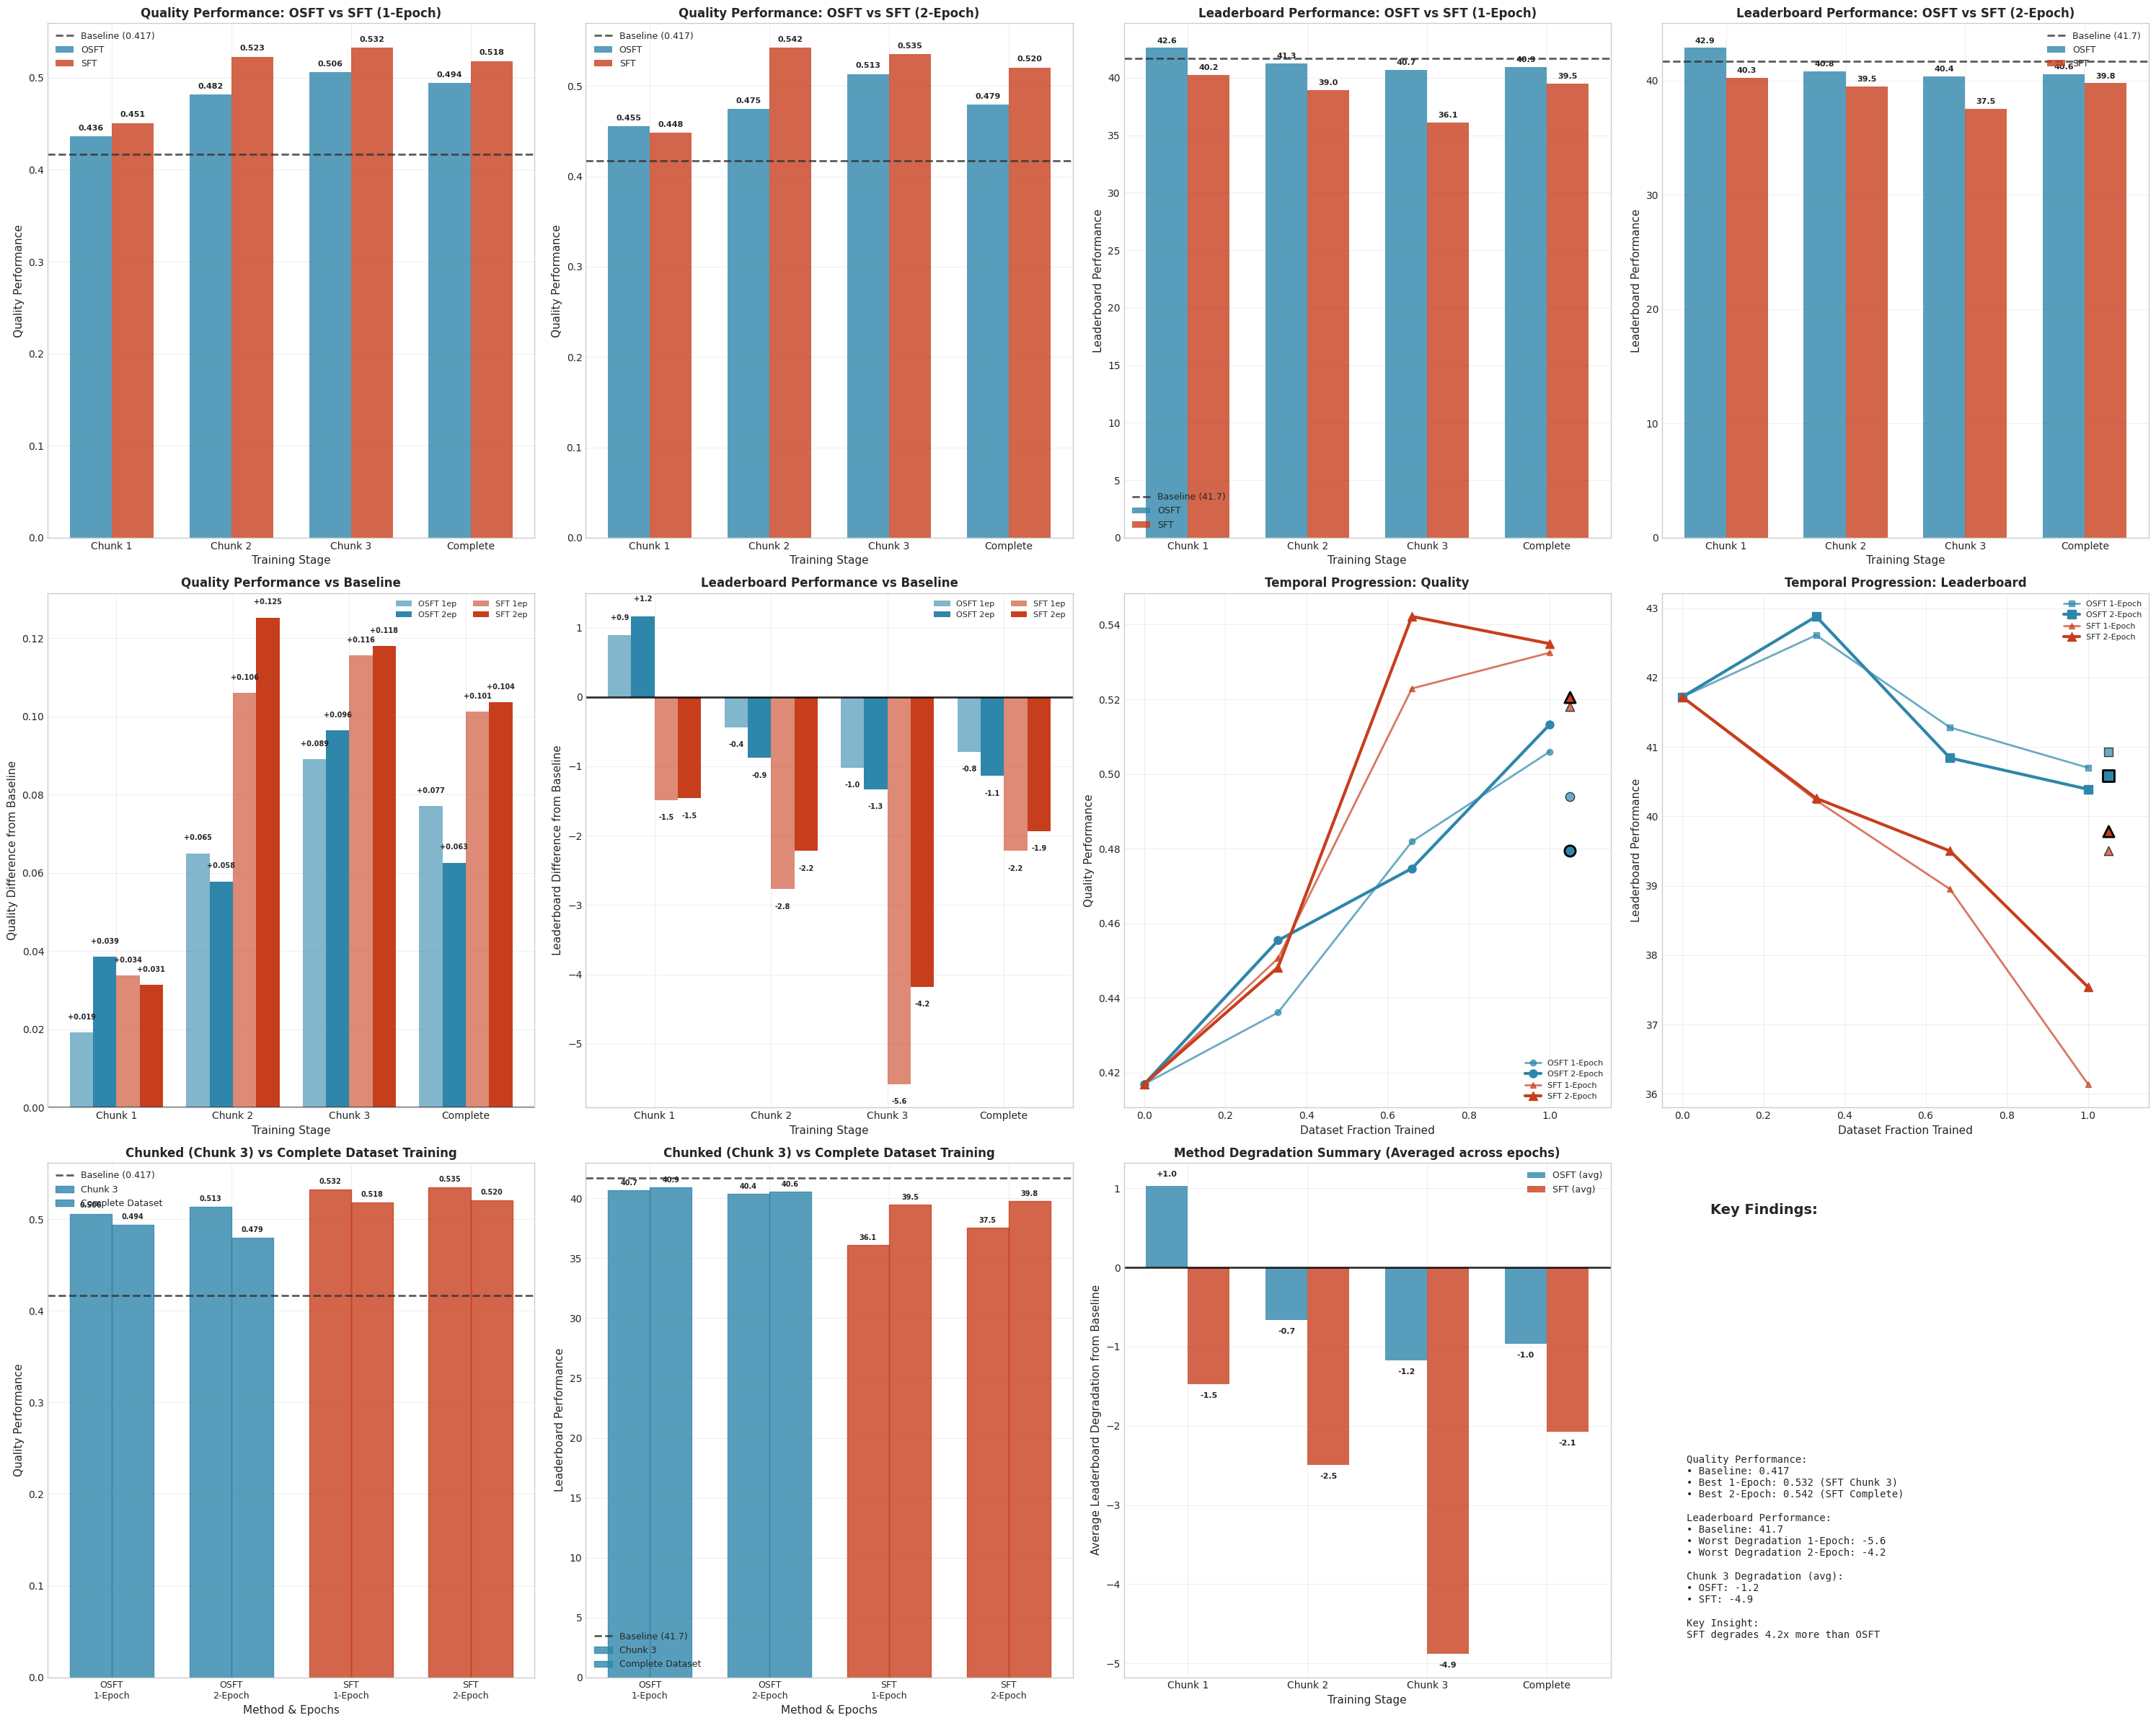

✅ Updated comparison plots created!

📊 Plot Summary:
1-4: Direct OSFT vs SFT comparisons for 1-epoch and 2-epoch
5-6: Performance vs baseline for all experiments
7-8: Temporal progression showing all methods
9-10: Chunked vs complete dataset comparison
11: Method degradation summary
12: Key metrics and insights


In [10]:
# Comprehensive Comparison Plots - Focused on Key Comparisons

# Create comprehensive comparison figure
fig = plt.figure(figsize=(30, 24))

# Color schemes
colors_method = {'baseline': '#333333', 'osft': '#2E86AB', 'sft': '#C73E1D'}
colors_epoch = {'1-epoch': '#4A90E2', '2-epoch': '#F39C12'}

# Prepare common data
exp_stages = ['Chunk 1', 'Chunk 2', 'Chunk 3', 'Complete']
baseline_quality = experiments_data['Baseline']['quality_accuracy']
baseline_lb = experiments_data['Baseline']['leaderboard_overall']

# OSFT data
osft_1epoch = [
    experiments_data['First Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data['Second Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data['Third Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data['Complete Dataset\n(OSFT)']['quality_accuracy']
]
osft_2epoch = [
    experiments_data_2epoch['First Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data_2epoch['Second Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data_2epoch['Third Chunk\n(OSFT)']['quality_accuracy'],
    experiments_data_2epoch['Complete Dataset\n(OSFT)']['quality_accuracy']
]

# SFT data
sft_1epoch = [
    experiments_data['First Chunk\n(SFT)']['quality_accuracy'],
    experiments_data['Second Chunk\n(SFT)']['quality_accuracy'],
    experiments_data['Third Chunk\n(SFT)']['quality_accuracy'],
    experiments_data['Complete Dataset\n(SFT)']['quality_accuracy']
]
sft_2epoch = [
    experiments_data_2epoch['First Chunk\n(SFT)']['quality_accuracy'],
    experiments_data_2epoch['Second Chunk\n(SFT)']['quality_accuracy'],
    experiments_data_2epoch['Third Chunk\n(SFT)']['quality_accuracy'],
    experiments_data_2epoch['Complete Dataset\n(SFT)']['quality_accuracy']
]

# Leaderboard data
osft_1epoch_lb = [
    experiments_data['First Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data['Second Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data['Third Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data['Complete Dataset\n(OSFT)']['leaderboard_overall']
]
osft_2epoch_lb = [
    experiments_data_2epoch['First Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data_2epoch['Second Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data_2epoch['Third Chunk\n(OSFT)']['leaderboard_overall'],
    experiments_data_2epoch['Complete Dataset\n(OSFT)']['leaderboard_overall']
]
sft_1epoch_lb = [
    experiments_data['First Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data['Second Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data['Third Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data['Complete Dataset\n(SFT)']['leaderboard_overall']
]
sft_2epoch_lb = [
    experiments_data_2epoch['First Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data_2epoch['Second Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data_2epoch['Third Chunk\n(SFT)']['leaderboard_overall'],
    experiments_data_2epoch['Complete Dataset\n(SFT)']['leaderboard_overall']
]

x = np.arange(len(exp_stages))
width = 0.35

# 1. Quality Performance: OSFT vs SFT (1-Epoch)
ax1 = plt.subplot(3, 4, 1)
bars1 = ax1.bar(x - width/2, osft_1epoch, width, label='OSFT', color='#2E86AB', alpha=0.8)
bars2 = ax1.bar(x + width/2, sft_1epoch, width, label='SFT', color='#C73E1D', alpha=0.8)
ax1.axhline(y=baseline_quality, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_quality:.3f})', alpha=0.8)
for bar, score in zip(bars1, osft_1epoch):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
for bar, score in zip(bars2, sft_1epoch):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
ax1.set_xlabel('Training Stage', fontsize=11)
ax1.set_ylabel('Quality Performance', fontsize=11)
ax1.set_title('Quality Performance: OSFT vs SFT (1-Epoch)', fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(exp_stages, fontsize=10)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# 2. Quality Performance: OSFT vs SFT (2-Epoch)
ax2 = plt.subplot(3, 4, 2)
bars3 = ax2.bar(x - width/2, osft_2epoch, width, label='OSFT', color='#2E86AB', alpha=0.8)
bars4 = ax2.bar(x + width/2, sft_2epoch, width, label='SFT', color='#C73E1D', alpha=0.8)
ax2.axhline(y=baseline_quality, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_quality:.3f})', alpha=0.8)
for bar, score in zip(bars3, osft_2epoch):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
for bar, score in zip(bars4, sft_2epoch):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
ax2.set_xlabel('Training Stage', fontsize=11)
ax2.set_ylabel('Quality Performance', fontsize=11)
ax2.set_title('Quality Performance: OSFT vs SFT (2-Epoch)', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(exp_stages, fontsize=10)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. Leaderboard Performance: OSFT vs SFT (1-Epoch)
ax3 = plt.subplot(3, 4, 3)
bars5 = ax3.bar(x - width/2, osft_1epoch_lb, width, label='OSFT', color='#2E86AB', alpha=0.8)
bars6 = ax3.bar(x + width/2, sft_1epoch_lb, width, label='SFT', color='#C73E1D', alpha=0.8)
ax3.axhline(y=baseline_lb, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_lb:.1f})', alpha=0.8)
for bar, score in zip(bars5, osft_1epoch_lb):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
for bar, score in zip(bars6, sft_1epoch_lb):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
ax3.set_xlabel('Training Stage', fontsize=11)
ax3.set_ylabel('Leaderboard Performance', fontsize=11)
ax3.set_title('Leaderboard Performance: OSFT vs SFT (1-Epoch)', fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(exp_stages, fontsize=10)
ax3.legend(fontsize=9)
ax3.grid(True, alpha=0.3)

# 4. Leaderboard Performance: OSFT vs SFT (2-Epoch)
ax4 = plt.subplot(3, 4, 4)
bars7 = ax4.bar(x - width/2, osft_2epoch_lb, width, label='OSFT', color='#2E86AB', alpha=0.8)
bars8 = ax4.bar(x + width/2, sft_2epoch_lb, width, label='SFT', color='#C73E1D', alpha=0.8)
ax4.axhline(y=baseline_lb, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_lb:.1f})', alpha=0.8)
for bar, score in zip(bars7, osft_2epoch_lb):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
for bar, score in zip(bars8, sft_2epoch_lb):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3, 
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=8)
ax4.set_xlabel('Training Stage', fontsize=11)
ax4.set_ylabel('Leaderboard Performance', fontsize=11)
ax4.set_title('Leaderboard Performance: OSFT vs SFT (2-Epoch)', fontsize=12, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(exp_stages, fontsize=10)
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# 5. Quality Performance vs Baseline (All experiments)
ax5 = plt.subplot(3, 4, 5)
# Compare each method's performance to baseline
osft_1epoch_vs_baseline = [val - baseline_quality for val in osft_1epoch]
osft_2epoch_vs_baseline = [val - baseline_quality for val in osft_2epoch]
sft_1epoch_vs_baseline = [val - baseline_quality for val in sft_1epoch]
sft_2epoch_vs_baseline = [val - baseline_quality for val in sft_2epoch]

x_adj = np.arange(len(exp_stages))
width_adj = 0.2
bars9a = ax5.bar(x_adj - 1.5*width_adj, osft_1epoch_vs_baseline, width_adj, 
                label='OSFT 1ep', color='#2E86AB', alpha=0.6)
bars9b = ax5.bar(x_adj - 0.5*width_adj, osft_2epoch_vs_baseline, width_adj, 
                label='OSFT 2ep', color='#2E86AB', alpha=1.0)
bars10a = ax5.bar(x_adj + 0.5*width_adj, sft_1epoch_vs_baseline, width_adj, 
                 label='SFT 1ep', color='#C73E1D', alpha=0.6)
bars10b = ax5.bar(x_adj + 1.5*width_adj, sft_2epoch_vs_baseline, width_adj, 
                 label='SFT 2ep', color='#C73E1D', alpha=1.0)
ax5.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=0.8)
for bars in [bars9a, bars9b, bars10a, bars10b]:
    for bar in bars:
        height = bar.get_height()
        va = 'bottom' if height >= 0 else 'top'
        ax5.text(bar.get_x() + bar.get_width()/2, height + (0.003 if height >= 0 else -0.003), 
                 f'{height:+.3f}', ha='center', va=va, fontweight='bold', fontsize=7)
ax5.set_xlabel('Training Stage', fontsize=11)
ax5.set_ylabel('Quality Difference from Baseline', fontsize=11)
ax5.set_title('Quality Performance vs Baseline', fontsize=12, fontweight='bold')
ax5.set_xticks(x_adj)
ax5.set_xticklabels(exp_stages, fontsize=10)
ax5.legend(fontsize=8, ncol=2)
ax5.grid(True, alpha=0.3)

# 6. Leaderboard Performance vs Baseline (All experiments)
ax6 = plt.subplot(3, 4, 6)
osft_1epoch_lb_vs_baseline = [val - baseline_lb for val in osft_1epoch_lb]
osft_2epoch_lb_vs_baseline = [val - baseline_lb for val in osft_2epoch_lb]
sft_1epoch_lb_vs_baseline = [val - baseline_lb for val in sft_1epoch_lb]
sft_2epoch_lb_vs_baseline = [val - baseline_lb for val in sft_2epoch_lb]

bars11a = ax6.bar(x_adj - 1.5*width_adj, osft_1epoch_lb_vs_baseline, width_adj, 
                 label='OSFT 1ep', color='#2E86AB', alpha=0.6)
bars11b = ax6.bar(x_adj - 0.5*width_adj, osft_2epoch_lb_vs_baseline, width_adj, 
                 label='OSFT 2ep', color='#2E86AB', alpha=1.0)
bars12a = ax6.bar(x_adj + 0.5*width_adj, sft_1epoch_lb_vs_baseline, width_adj, 
                 label='SFT 1ep', color='#C73E1D', alpha=0.6)
bars12b = ax6.bar(x_adj + 1.5*width_adj, sft_2epoch_lb_vs_baseline, width_adj, 
                 label='SFT 2ep', color='#C73E1D', alpha=1.0)
ax6.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=0.8)
for bars in [bars11a, bars11b, bars12a, bars12b]:
    for bar in bars:
        height = bar.get_height()
        va = 'bottom' if height >= 0 else 'top'
        ax6.text(bar.get_x() + bar.get_width()/2, height + (0.2 if height >= 0 else -0.2), 
                 f'{height:+.1f}', ha='center', va=va, fontweight='bold', fontsize=7)
ax6.set_xlabel('Training Stage', fontsize=11)
ax6.set_ylabel('Leaderboard Difference from Baseline', fontsize=11)
ax6.set_title('Leaderboard Performance vs Baseline', fontsize=12, fontweight='bold')
ax6.set_xticks(x_adj)
ax6.set_xticklabels(exp_stages, fontsize=10)
ax6.legend(fontsize=8, ncol=2)
ax6.grid(True, alpha=0.3)

# 7. Temporal Progression: Quality (Both epochs shown)
ax7 = plt.subplot(3, 4, 7)
fractions = [0.0, 0.33, 0.66, 1.0]
osft_1e_temporal = [baseline_quality] + osft_1epoch[:3]
sft_1e_temporal = [baseline_quality] + sft_1epoch[:3]
osft_2e_temporal = [baseline_quality] + osft_2epoch[:3]
sft_2e_temporal = [baseline_quality] + sft_2epoch[:3]

ax7.plot(fractions, osft_1e_temporal, 'o-', linewidth=2, markersize=6, 
         label='OSFT 1-Epoch', color='#2E86AB', alpha=0.7)
ax7.plot(fractions, osft_2e_temporal, 'o-', linewidth=3, markersize=8, 
         label='OSFT 2-Epoch', color='#2E86AB', alpha=1.0)
ax7.plot(fractions, sft_1e_temporal, '^-', linewidth=2, markersize=6, 
         label='SFT 1-Epoch', color='#C73E1D', alpha=0.7)
ax7.plot(fractions, sft_2e_temporal, '^-', linewidth=3, markersize=8, 
         label='SFT 2-Epoch', color='#C73E1D', alpha=1.0)
ax7.scatter([1.05], [osft_1epoch[3]], s=80, marker='o', color='#2E86AB', alpha=0.7, 
           edgecolors='black', linewidth=1)
ax7.scatter([1.05], [osft_2epoch[3]], s=120, marker='o', color='#2E86AB', alpha=1.0, 
           edgecolors='black', linewidth=2)
ax7.scatter([1.05], [sft_1epoch[3]], s=80, marker='^', color='#C73E1D', alpha=0.7, 
           edgecolors='black', linewidth=1)
ax7.scatter([1.05], [sft_2epoch[3]], s=120, marker='^', color='#C73E1D', alpha=1.0, 
           edgecolors='black', linewidth=2)
ax7.set_xlabel('Dataset Fraction Trained', fontsize=11)
ax7.set_ylabel('Quality Performance', fontsize=11)
ax7.set_title('Temporal Progression: Quality', fontsize=12, fontweight='bold')
ax7.legend(loc='lower right', fontsize=8)
ax7.set_xlim(-0.05, 1.15)
ax7.grid(True, alpha=0.3)

# 8. Temporal Progression: Leaderboard
ax8 = plt.subplot(3, 4, 8)
osft_1e_lb_temporal = [baseline_lb] + osft_1epoch_lb[:3]
sft_1e_lb_temporal = [baseline_lb] + sft_1epoch_lb[:3]
osft_2e_lb_temporal = [baseline_lb] + osft_2epoch_lb[:3]
sft_2e_lb_temporal = [baseline_lb] + sft_2epoch_lb[:3]

ax8.plot(fractions, osft_1e_lb_temporal, 's-', linewidth=2, markersize=6, 
         label='OSFT 1-Epoch', color='#2E86AB', alpha=0.7)
ax8.plot(fractions, osft_2e_lb_temporal, 's-', linewidth=3, markersize=8, 
         label='OSFT 2-Epoch', color='#2E86AB', alpha=1.0)
ax8.plot(fractions, sft_1e_lb_temporal, '^-', linewidth=2, markersize=6, 
         label='SFT 1-Epoch', color='#C73E1D', alpha=0.7)
ax8.plot(fractions, sft_2e_lb_temporal, '^-', linewidth=3, markersize=8, 
         label='SFT 2-Epoch', color='#C73E1D', alpha=1.0)
ax8.scatter([1.05], [osft_1epoch_lb[3]], s=80, marker='s', color='#2E86AB', alpha=0.7, 
           edgecolors='black', linewidth=1)
ax8.scatter([1.05], [osft_2epoch_lb[3]], s=120, marker='s', color='#2E86AB', alpha=1.0, 
           edgecolors='black', linewidth=2)
ax8.scatter([1.05], [sft_1epoch_lb[3]], s=80, marker='^', color='#C73E1D', alpha=0.7, 
           edgecolors='black', linewidth=1)
ax8.scatter([1.05], [sft_2epoch_lb[3]], s=120, marker='^', color='#C73E1D', alpha=1.0, 
           edgecolors='black', linewidth=2)
ax8.set_xlabel('Dataset Fraction Trained', fontsize=11)
ax8.set_ylabel('Leaderboard Performance', fontsize=11)
ax8.set_title('Temporal Progression: Leaderboard', fontsize=12, fontweight='bold')
ax8.legend(loc='upper right', fontsize=8)
ax8.set_xlim(-0.05, 1.15)
ax8.grid(True, alpha=0.3)

# 9. Chunked vs Complete Dataset Comparison (Quality)
ax9 = plt.subplot(3, 4, 9)
# Focus on showing how chunked training (chunk 3) compares to complete dataset training
methods = ['OSFT\n1-Epoch', 'OSFT\n2-Epoch', 'SFT\n1-Epoch', 'SFT\n2-Epoch']
chunk3_quality = [osft_1epoch[2], osft_2epoch[2], sft_1epoch[2], sft_2epoch[2]]
complete_quality = [osft_1epoch[3], osft_2epoch[3], sft_1epoch[3], sft_2epoch[3]]

x_comp = np.arange(len(methods))
width_comp = 0.35
bars_chunk = ax9.bar(x_comp - width_comp/2, chunk3_quality, width_comp, 
                    label='Chunk 3', alpha=0.8)
bars_complete = ax9.bar(x_comp + width_comp/2, complete_quality, width_comp, 
                       label='Complete Dataset', alpha=0.8)

# Color bars by method
for i, (bar_c, bar_comp) in enumerate(zip(bars_chunk, bars_complete)):
    if i < 2:  # OSFT
        bar_c.set_color('#2E86AB')
        bar_comp.set_color('#2E86AB')
    else:  # SFT
        bar_c.set_color('#C73E1D')
        bar_comp.set_color('#C73E1D')

ax9.axhline(y=baseline_quality, color='#333333', linestyle='--', linewidth=2, 
           label=f'Baseline ({baseline_quality:.3f})', alpha=0.8)

for bar in bars_chunk:
    height = bar.get_height()
    ax9.text(bar.get_x() + bar.get_width()/2, height + 0.005, 
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=7)
for bar in bars_complete:
    height = bar.get_height()
    ax9.text(bar.get_x() + bar.get_width()/2, height + 0.005, 
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=7)

ax9.set_xlabel('Method & Epochs', fontsize=11)
ax9.set_ylabel('Quality Performance', fontsize=11)
ax9.set_title('Chunked (Chunk 3) vs Complete Dataset Training', fontsize=12, fontweight='bold')
ax9.set_xticks(x_comp)
ax9.set_xticklabels(methods, fontsize=9)
ax9.legend(fontsize=9)
ax9.grid(True, alpha=0.3)

# 10. Chunked vs Complete Dataset Comparison (Leaderboard)
ax10 = plt.subplot(3, 4, 10)
chunk3_lb = [osft_1epoch_lb[2], osft_2epoch_lb[2], sft_1epoch_lb[2], sft_2epoch_lb[2]]
complete_lb = [osft_1epoch_lb[3], osft_2epoch_lb[3], sft_1epoch_lb[3], sft_2epoch_lb[3]]

bars_chunk_lb = ax10.bar(x_comp - width_comp/2, chunk3_lb, width_comp, 
                        label='Chunk 3', alpha=0.8)
bars_complete_lb = ax10.bar(x_comp + width_comp/2, complete_lb, width_comp, 
                           label='Complete Dataset', alpha=0.8)

for i, (bar_c, bar_comp) in enumerate(zip(bars_chunk_lb, bars_complete_lb)):
    if i < 2:  # OSFT
        bar_c.set_color('#2E86AB')
        bar_comp.set_color('#2E86AB')
    else:  # SFT
        bar_c.set_color('#C73E1D')
        bar_comp.set_color('#C73E1D')

ax10.axhline(y=baseline_lb, color='#333333', linestyle='--', linewidth=2, 
            label=f'Baseline ({baseline_lb:.1f})', alpha=0.8)

for bar in bars_chunk_lb:
    height = bar.get_height()
    ax10.text(bar.get_x() + bar.get_width()/2, height + 0.3, 
              f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=7)
for bar in bars_complete_lb:
    height = bar.get_height()
    ax10.text(bar.get_x() + bar.get_width()/2, height + 0.3, 
              f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=7)

ax10.set_xlabel('Method & Epochs', fontsize=11)
ax10.set_ylabel('Leaderboard Performance', fontsize=11)
ax10.set_title('Chunked (Chunk 3) vs Complete Dataset Training', fontsize=12, fontweight='bold')
ax10.set_xticks(x_comp)
ax10.set_xticklabels(methods, fontsize=9)
ax10.legend(fontsize=9)
ax10.grid(True, alpha=0.3)

# 11. Summary: Method Performance Degradation
ax11 = plt.subplot(3, 4, 11)
# Show how much each method degrades from baseline at different stages
stages_summary = ['Chunk 1', 'Chunk 2', 'Chunk 3', 'Complete']

# Calculate average degradation across epochs for each method
osft_avg_deg = [(osft_1epoch_lb[i] + osft_2epoch_lb[i])/2 - baseline_lb for i in range(4)]
sft_avg_deg = [(sft_1epoch_lb[i] + sft_2epoch_lb[i])/2 - baseline_lb for i in range(4)]

x_deg = np.arange(len(stages_summary))
width_deg = 0.35

bars_osft_deg = ax11.bar(x_deg - width_deg/2, osft_avg_deg, width_deg, 
                        label='OSFT (avg)', color='#2E86AB', alpha=0.8)
bars_sft_deg = ax11.bar(x_deg + width_deg/2, sft_avg_deg, width_deg, 
                       label='SFT (avg)', color='#C73E1D', alpha=0.8)

ax11.axhline(y=0, color='black', linestyle='-', linewidth=2, alpha=0.8)

for bar in bars_osft_deg:
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    ax11.text(bar.get_x() + bar.get_width()/2, height + (0.1 if height >= 0 else -0.1), 
              f'{height:+.1f}', ha='center', va=va, fontweight='bold', fontsize=8)
for bar in bars_sft_deg:
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    ax11.text(bar.get_x() + bar.get_width()/2, height + (0.1 if height >= 0 else -0.1), 
              f'{height:+.1f}', ha='center', va=va, fontweight='bold', fontsize=8)

ax11.set_xlabel('Training Stage', fontsize=11)
ax11.set_ylabel('Average Leaderboard Degradation from Baseline', fontsize=11)
ax11.set_title('Method Degradation Summary (Averaged across epochs)', fontsize=12, fontweight='bold')
ax11.set_xticks(x_deg)
ax11.set_xticklabels(stages_summary, fontsize=10)
ax11.legend(fontsize=9)
ax11.grid(True, alpha=0.3)

# 12. Key Metrics Summary
ax12 = plt.subplot(3, 4, 12)
# Create a summary visualization showing key metrics
ax12.text(0.1, 0.9, 'Key Findings:', fontsize=14, fontweight='bold', transform=ax12.transAxes)

# Calculate key metrics
baseline_q = baseline_quality
baseline_l = baseline_lb

# Best quality performers
best_q_1e = max(sft_1epoch)
best_q_2e = max(sft_2epoch)
best_q_1e_name = 'SFT Chunk 3' if sft_1epoch[2] == best_q_1e else 'SFT Complete'
best_q_2e_name = 'SFT Chunk 3' if sft_2epoch[2] == best_q_2e else 'SFT Complete'

# Worst leaderboard degradation
worst_lb_1e = min(sft_1epoch_lb)
worst_lb_2e = min(sft_2epoch_lb)
worst_lb_1e_deg = worst_lb_1e - baseline_lb
worst_lb_2e_deg = worst_lb_2e - baseline_lb

# OSFT vs SFT average degradation (chunk 3)
osft_chunk3_avg_deg = (osft_1epoch_lb[2] + osft_2epoch_lb[2])/2 - baseline_lb
sft_chunk3_avg_deg = (sft_1epoch_lb[2] + sft_2epoch_lb[2])/2 - baseline_lb

summary_text = f"""
Quality Performance:
• Baseline: {baseline_q:.3f}
• Best 1-Epoch: {best_q_1e:.3f} ({best_q_1e_name})
• Best 2-Epoch: {best_q_2e:.3f} ({best_q_2e_name})

Leaderboard Performance:
• Baseline: {baseline_l:.1f}
• Worst Degradation 1-Epoch: {worst_lb_1e_deg:+.1f}
• Worst Degradation 2-Epoch: {worst_lb_2e_deg:+.1f}

Chunk 3 Degradation (avg):
• OSFT: {osft_chunk3_avg_deg:+.1f}
• SFT: {sft_chunk3_avg_deg:+.1f}

Key Insight:
SFT degrades {abs(sft_chunk3_avg_deg/osft_chunk3_avg_deg):.1f}x more than OSFT
"""

ax12.text(0.05, 0.05, summary_text, fontsize=10, transform=ax12.transAxes, 
         verticalalignment='bottom', fontfamily='monospace')
ax12.set_xlim(0, 1)
ax12.set_ylim(0, 1)
ax12.axis('off')

plt.tight_layout()
plt.show()

print("✅ Updated comparison plots created!")
print("\n📊 Plot Summary:")
print("1-4: Direct OSFT vs SFT comparisons for 1-epoch and 2-epoch")
print("5-6: Performance vs baseline for all experiments")
print("7-8: Temporal progression showing all methods")
print("9-10: Chunked vs complete dataset comparison")
print("11: Method degradation summary")
print("12: Key metrics and insights")
